In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset - Rose

In [3]:
path1=('/content/drive/MyDrive/Rose.csv')
df1=pd.read_csv(path1)
df1.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

## Exploratory Data Analysis

In [4]:
df1.dtypes

YearMonth     object
Rose         float64
dtype: object

### Treating the dataset for ease:
Since we have monthly data for years starting from 1980 to 1995 combined, let us draw a date range and incoporate as "TimeStamp" and drop "YearMonth" for ease

In [5]:
date=pd.date_range(start='01/01/1980', end='08/01/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
df1['TimeStamp']=pd.DataFrame(date, columns=['Month'])
df1.head()

YearMonth   Rose  TimeStamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [7]:
df1['TimeStamp']=pd.to_datetime(df1['TimeStamp'])
df1=df1.set_index('TimeStamp')
df1.drop(['YearMonth'], axis=1, inplace=True)
df1.head()

Rose
TimeStamp        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

### Basic details and Descriptive Statistics of Rose 

In [8]:
print("The number of rows: ",df1.shape[0], "\n""The number of columns: ",df1.shape[1])

The number of rows:  187 
The number of columns:  1


In [9]:
np.round(df1.describe(),2).T

count   mean    std   min   25%   50%    75%    max
Rose  185.0  90.39  39.18  28.0  63.0  86.0  112.0  267.0

#### Checking for missing values and Interpolation

In [10]:
df1.isna().sum()

Rose    2
dtype: int64

In [11]:
df1 = df1.interpolate()

In [12]:
df1.isna().sum()

Rose    0
dtype: int64

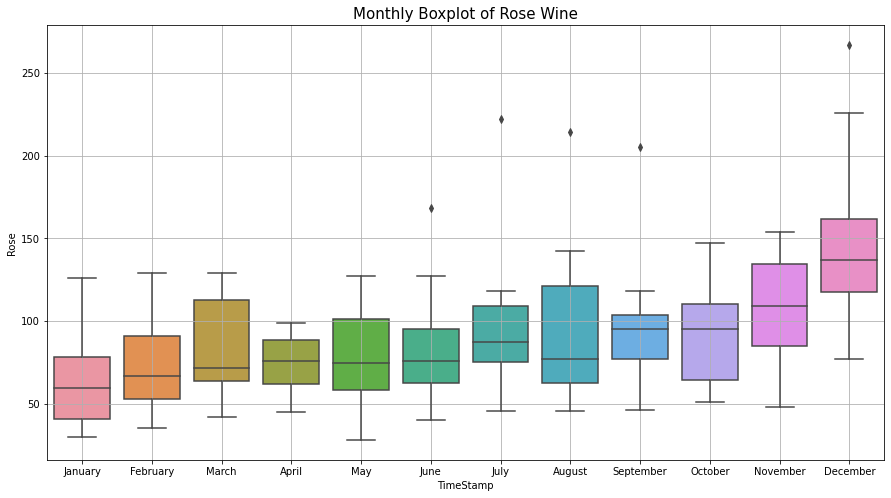

In [13]:
rcParams['figure.figsize']=15,8
sns.boxplot(x = df1.index.month_name(), y = df1['Rose']);
plt.grid();
plt.title('Monthly Boxplot of Rose Wine', fontsize=15);

In [14]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Rose', columns = df1.index.month, index = df1.index.year)
monthly_sales_across_years

TimeStamp     1      2      3     4      5      6           7           8   \
TimeStamp                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

TimeStamp     9      10     11     12  
TimeStamp                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

Text(0.5, 1.0, 'Monthly sales over years of Rose Wine')

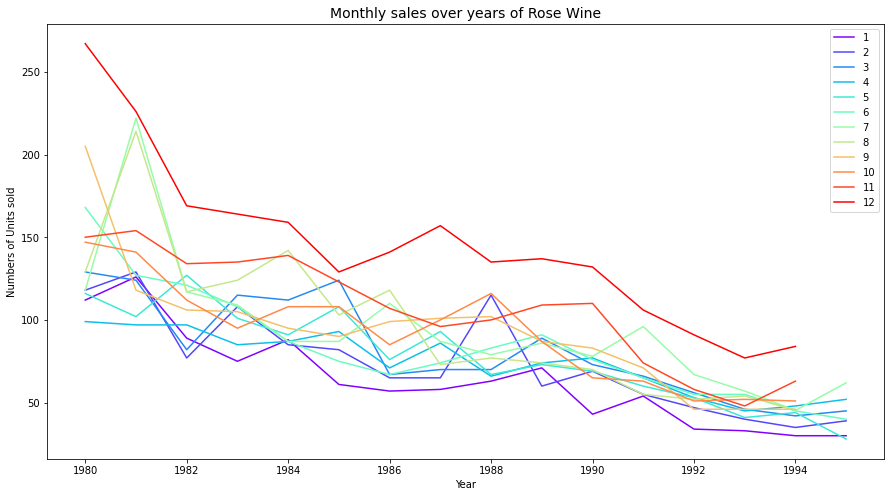

In [15]:
plt.figure.figsize=(15,8)
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Numbers of Units sold')
plt.xlabel('Year')
plt.title('Monthly sales over years of Rose Wine', fontsize=14)

### Visualization of Time Series in Rose

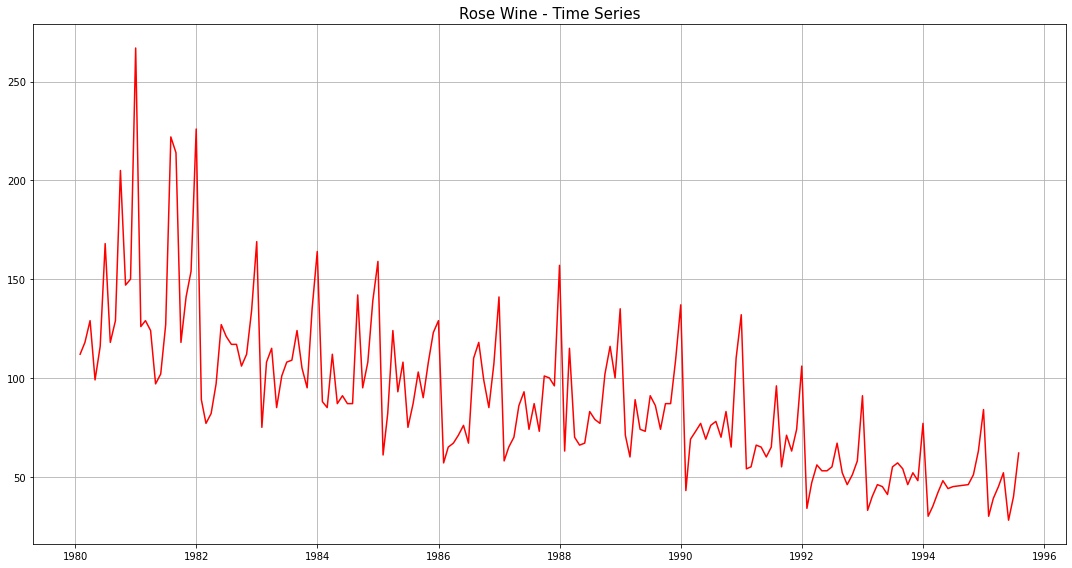

In [16]:
rcParams['figure.figsize']=15,8
plt.grid();
plt.title('Rose Wine - Time Series', fontsize=15);
plt.plot(df1, color='red')
plt.tight_layout();

### Decompose the Time Series and plot the different components.

#### Additive Decomposition of Rose

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

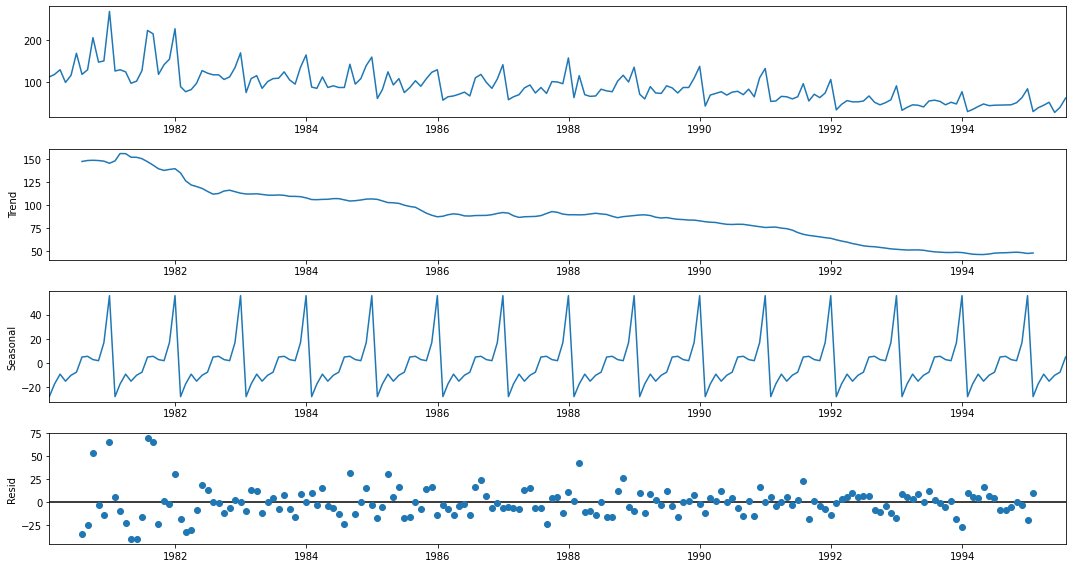

In [18]:
df1_decompose = seasonal_decompose(df1, model='additive', period=12) #since here we are considering yearly seasonality and trend having monthly freq
df1_decompose.plot()
plt.tight_layout()
plt.show();

In [19]:
R_Trend=df1_decompose.trend
R_Seasonality=df1_decompose.seasonal
R_Residual=df1_decompose.resid

print ('R_Trend', R_Trend.head(10), '\n')
print ('R_Seasonality', R_Seasonality.head(10), '\n')
print ('R_Residual', R_Residual.head(10), '\n')

R_Trend TimeStamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
Name: trend, dtype: float64 

R_Seasonality TimeStamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
Name: seasonal, dtype: float64 

R_Residual TimeStamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
Name: resid, dtype: float64 



In [20]:
R_Trend.head(12).to_csv('rose_trend.csv')
R_Seasonality.head(12).to_csv('rose_season.csv')
R_Residual.head(12).to_csv('rose_resid.csv')

Text(0.5, 1.0, 'Residual Plot of Additive Decomposition for Rose Time Series')

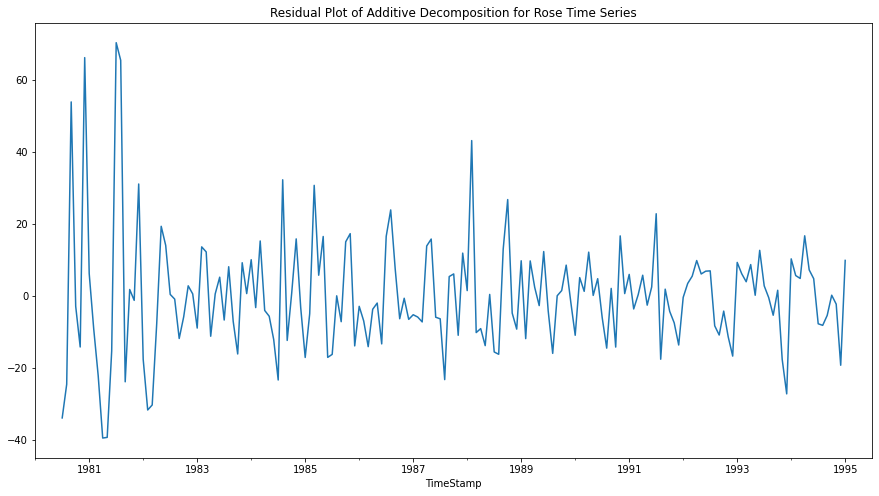

In [ ]:
#Let us know view R_Residual plot
R_Residual.plot()
plt.title('Residual Plot of Additive Decomposition for Rose Time Series')

#### Multiplicative Decomposition of Rose

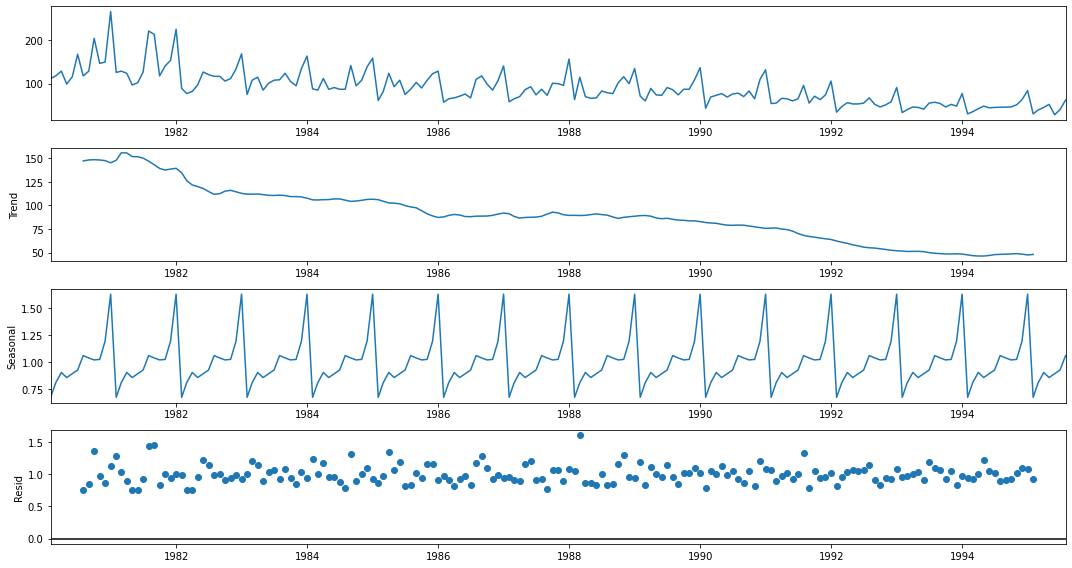

In [21]:
df1_Mdecompose = seasonal_decompose(df1, model='multiplicative', period=12)
df1_Mdecompose.plot()
plt.tight_layout()
plt.show();

In [22]:
RM_Trend=df1_Mdecompose.trend
RM_Seasonality=df1_Mdecompose.seasonal
RM_Residual=df1_Mdecompose.resid

print ('RM_Trend', RM_Trend.head(10), '\n')
print ('RM_Seasonality', RM_Seasonality.head(10), '\n')
print ('RM_Residual', RM_Residual.head(10), '\n')

RM_Trend TimeStamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
Name: trend, dtype: float64 

RM_Seasonality TimeStamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
Name: seasonal, dtype: float64 

RM_Residual TimeStamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
Name: resid, dtype: float64 



In [23]:
RM_Trend.head(12).to_csv('rose_mtrend.csv')
RM_Seasonality.head(12).to_csv('rose_mseason.csv')
RM_Residual.head(12).to_csv('rose_mresid.csv')

Text(0.5, 1.0, 'Residual Plot of Multiplicative Decomposition for Rose Time Series')

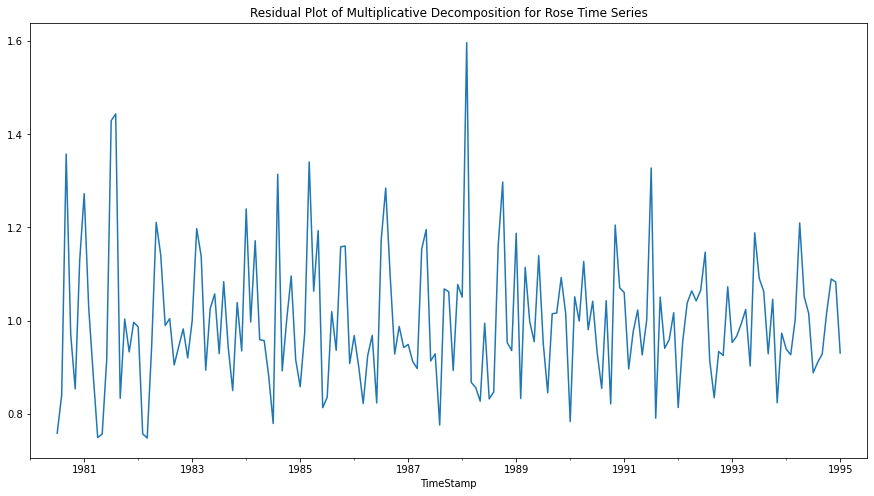

In [24]:
#Let us know view R_Residual plot for Multiplicative Decomposition
RM_Residual.plot()
plt.title('Residual Plot of Multiplicative Decomposition for Rose Time Series')

### Split the data into training and test. The test data should start in 1991.

In [25]:
rtrain=df1[df1.index<'1991']
rtest=df1[df1.index>='1991']

In [26]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


In [27]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [28]:
print('First few rows of Training Data')
display(rtrain.head())
print('Last few rows of Training Data')
display(rtrain.tail())
print('First few rows of Test Data')
display(rtest.head())
print('Last few rows of Test Data')
display(rtest.tail())

First few rows of Training Data


Rose
TimeStamp        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
TimeStamp        
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
TimeStamp       
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
TimeStamp       
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

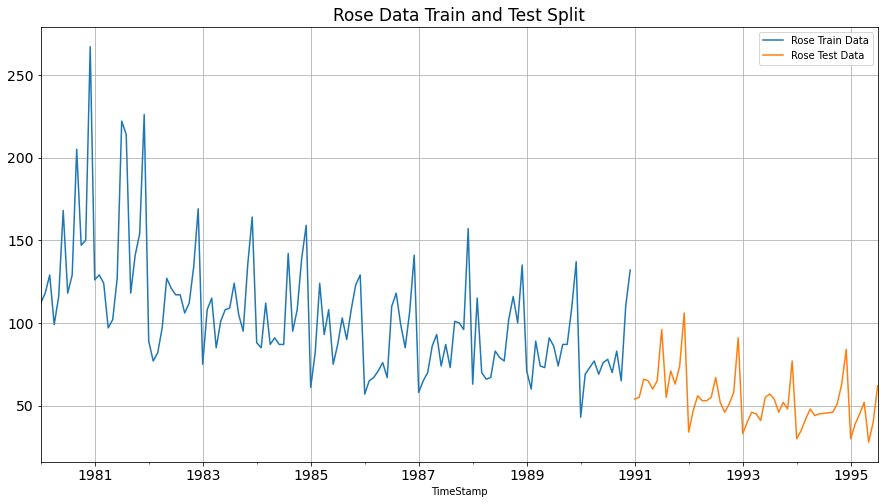

In [29]:
#Visualization of train and test data.
rtrain['Rose'].plot(fontsize=14)
rtest['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Rose Train Data','Rose Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.show();

### Build different Models and Model Evaluation

#### Model 1 - LINEAR REGRESSION

Before we start with Linear Regression we have to modify our training and test data so that we can build a model that is going to regress the 'Rose' variable against the order of the occurrence.

In [30]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


In [31]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [32]:
LR_train = rtrain.copy()
LR_test = rtest.copy()

In [33]:
LR_train['Time']=train_time
LR_test['Time']=test_time

In [34]:
print('First few rows of Training Data')
display(LR_train.head())
print('Last few rows of Training Data')
display(LR_train.tail())
print('First few rows of Test Data')
display(LR_test.head())
print('Last few rows of Test Data')
display(LR_test.tail())

First few rows of Training Data


Rose  Time
TimeStamp              
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5

Last few rows of Training Data


Rose  Time
TimeStamp              
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132

First few rows of Test Data


Rose  Time
TimeStamp             
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137

Last few rows of Test Data


Rose  Time
TimeStamp             
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187

In [35]:
#Let us build Linear Regression on the modified test and training data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [36]:
lr.fit(LR_train[['Time']],LR_train['Rose'])

LinearRegression()

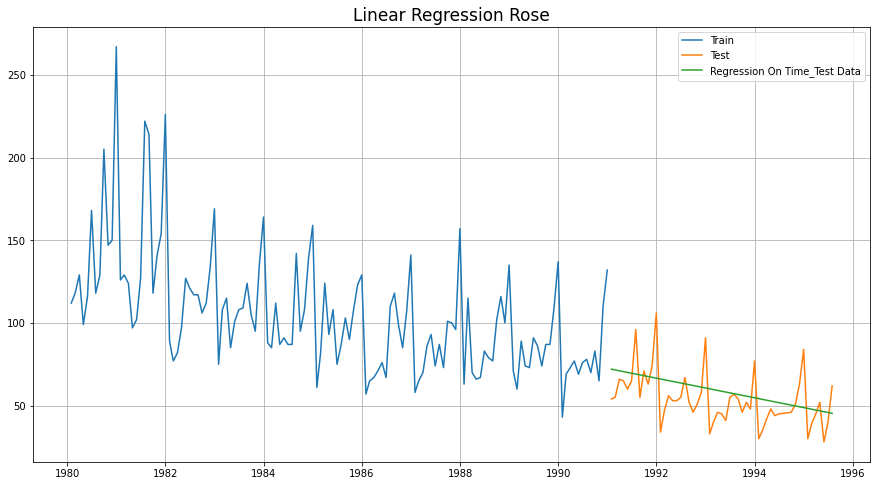

In [37]:
train_predictions_LR = lr.predict(LR_train[['Time']])
LR_train['RegOnTime']= train_predictions_LR

test_predictions_LR = lr.predict(LR_test[['Time']])
LR_test['RegOnTime'] = test_predictions_LR

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid()
plt.show();

In [38]:
#Model Evaluation
rmse_LR_test = mean_squared_error(rtest['Rose'],test_predictions_LR,squared=False)
print("For Regression On Time forecast on the Test Data,  RMSE is %3.3f " %(rmse_LR_test))

For Regression On Time forecast on the Test Data,  RMSE is 15.269 


In [39]:
#Let's create a DataFrame for all the RMSE Value
Results = pd.DataFrame({'Test RMSE Rose': [rmse_LR_test]},index=['Regression On Time'])
Results

Test RMSE Rose
Regression On Time       15.268955

#### Model 2 - NAIVE APPROACH

In [40]:
NM_train = rtrain.copy()
NM_test = rtest.copy()

In [42]:
rtrain.tail()

Rose
TimeStamp        
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

In [41]:
NM_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
NM_test['naive'].head()

TimeStamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

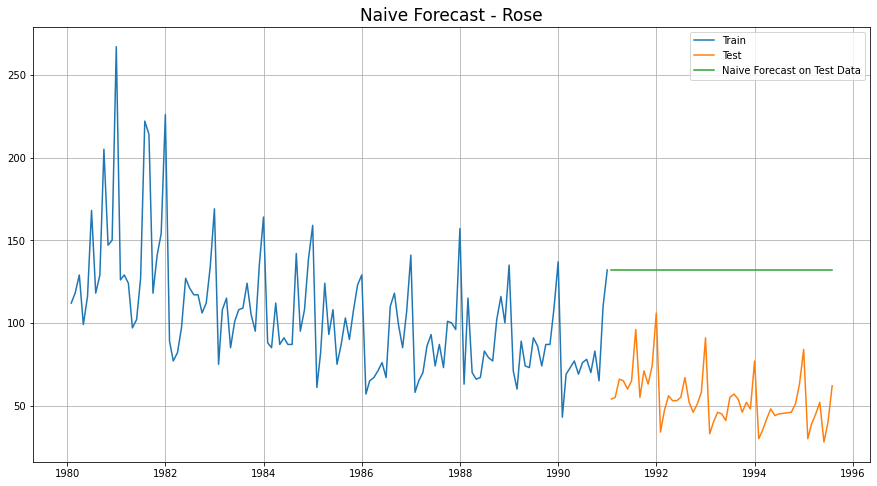

In [43]:
plt.plot(NM_train['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(NM_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Rose", fontsize=17)
plt.grid()
plt.show();

In [44]:
rmse_NM_test = mean_squared_error(rtest['Rose'],NM_test['naive'],squared=False)
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_NM_test))

For Naive Model forecast on the Test Data,  RMSE is 79.719


In [45]:
Results_21 = pd.DataFrame({'Test RMSE Rose': [rmse_NM_test]},index=['Naive Model'])
resultsDf3 = pd.concat([Results, Results_21], axis=0)
resultsDf3

Test RMSE Rose
Regression On Time       15.268955
Naive Model              79.718773

#### Model 3 - SIMPLE AVERAGE MODEL

In [46]:
#For this particular simple average method, we will forecast by using the average of the training values.
SA_train = rtrain.copy()
SA_test = rtest.copy()

In [47]:
SA_test['mean_forecast'] = rtrain['Rose'].mean()
SA_test.head()

Rose  mean_forecast
TimeStamp                      
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

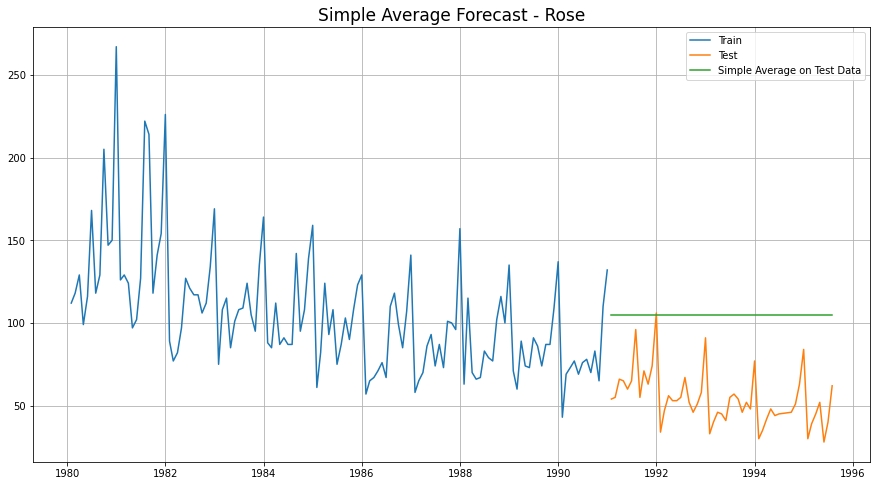

In [48]:
plt.plot(SA_train['Rose'], label='Train')
plt.plot(SA_test['Rose'], label='Test')

plt.plot(SA_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid()
plt.show();

In [49]:
rmse_SA_test = mean_squared_error(rtest['Rose'],SA_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_SA_test))

For Simple Average forecast on Rose Test Data,  RMSE is 53.461


In [50]:
resultsDf_31 = pd.DataFrame({'Test RMSE Rose': [rmse_SA_test]},index=['Simple Average Model'])
resultsDf_31

Test RMSE Rose
Simple Average Model        53.46057

In [51]:
resultsDf3 = pd.concat([Results, Results_21,resultsDf_31], axis=0)
resultsDf3

Test RMSE Rose
Regression On Time         15.268955
Naive Model                79.718773
Simple Average Model       53.460570

#### Model 4 - MOVING AVERAGE MODEL

In [147]:
MovingAverage = df1.copy()
MovingAverage.head()

Rose
TimeStamp        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [148]:
#Moving Models

MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_4  Trailing_6  Trailing_9
TimeStamp                                            
1980-01-31  112.0         NaN         NaN         NaN
1980-02-29  118.0         NaN         NaN         NaN
1980-03-31  129.0         NaN         NaN         NaN
1980-04-30   99.0       114.5         NaN         NaN
1980-05-31  116.0       115.5         NaN         NaN

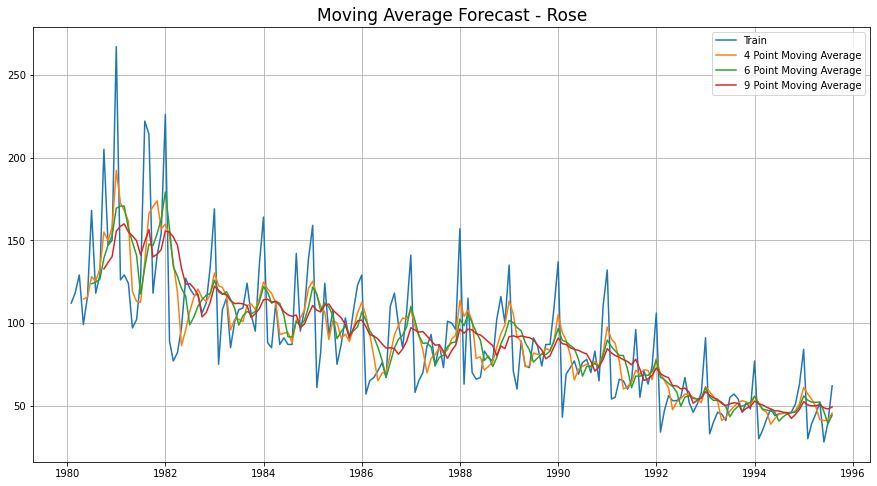

In [54]:
#Visulaizing the trailing models together on whole Rose dataset
plt.plot(MovingAverage['Rose'], label='Train')

plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid()
plt.title('Moving Average Forecast - Rose', fontsize=17)
plt.show();

In [55]:
#Splitting the data into test anr train again
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

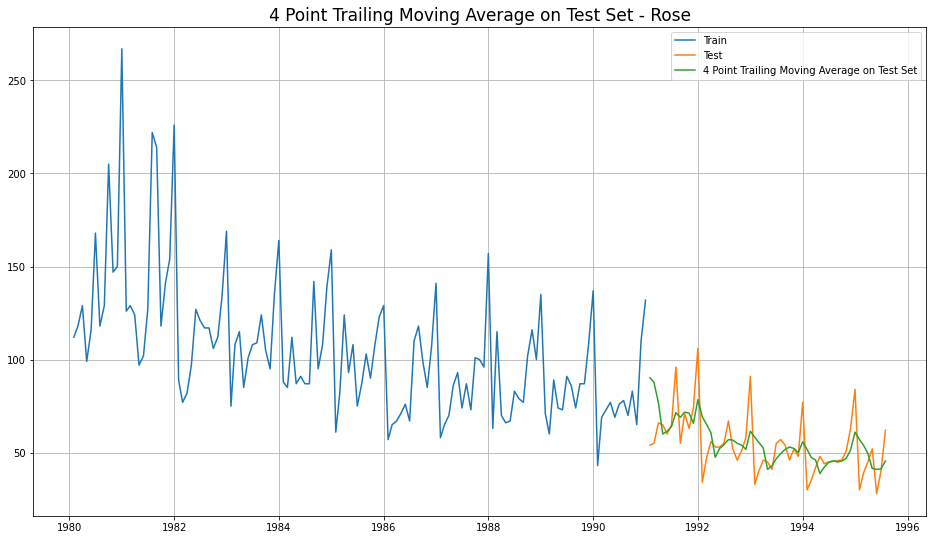

In [153]:
plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')

#The best location for title
plt.legend(loc ='best')
plt.grid()
plt.title('4 Point Trailing Moving Average on Test Set - Rose', fontsize=17);
plt.show();

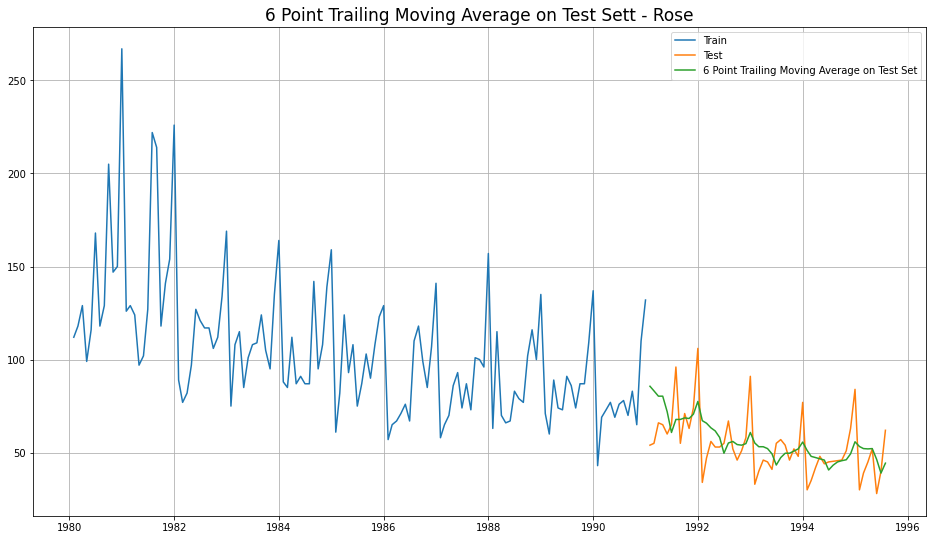

In [154]:
plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')

#The best location for title
plt.legend(loc ='best')
plt.grid()
plt.title('6 Point Trailing Moving Average on Test Sett - Rose', fontsize=17);
plt.show();

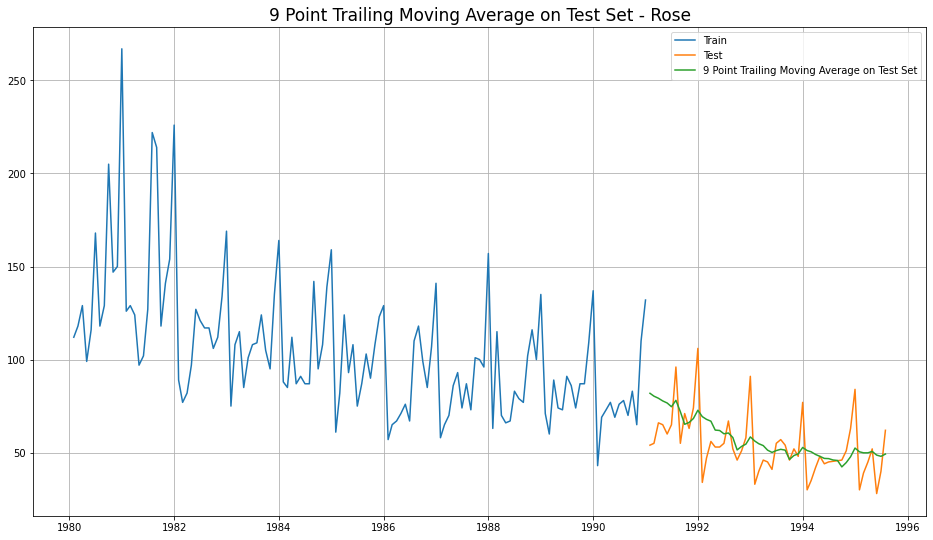

In [155]:
plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
#The best location for title
plt.legend(loc ='best')
plt.grid()
plt.title('9 Point Trailing Moving Average on Test Set - Rose', fontsize=17);
plt.show();

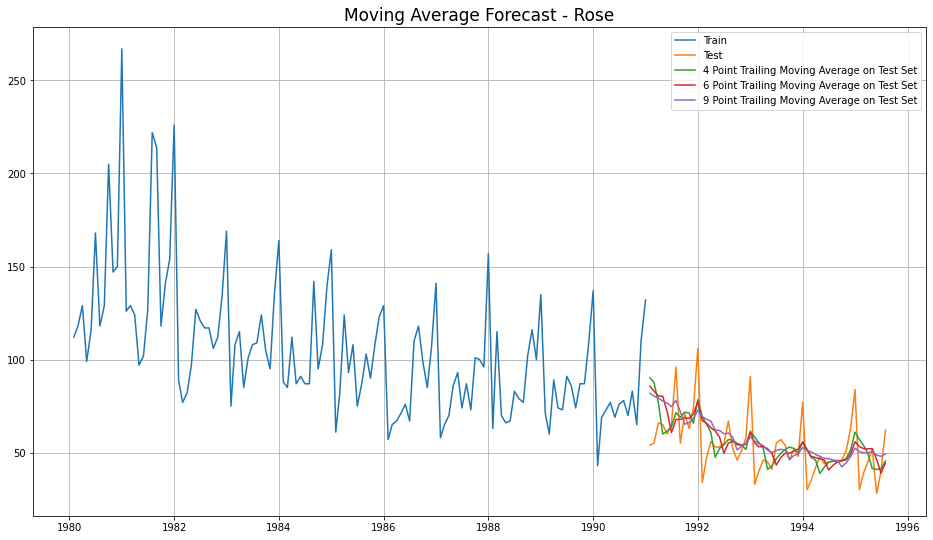

In [149]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
#The best location for title
plt.legend(loc ='best')
plt.grid()
plt.title('Moving Average Forecast - Rose', fontsize=17);
plt.show();

In [58]:
#Model Evaluation: This is done only on test data

## Test Data - RMSE --> 4 point Trailing MA

rmse_MA_test_4 = mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_MA_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_MA_test_6 = mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_MA_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_MA_test_9 = mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_MA_test_9))

For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.728


In [60]:
resultsDf_41 = pd.DataFrame({'Test RMSE Rose': [rmse_MA_test_4 ,rmse_MA_test_6,rmse_MA_test_9]} ,index=['4point Trailing MovingAverage','6point Trailing MovingAverage','9point Trailing MovingAverage'])
resultsDf_41

Test RMSE Rose
4point Trailing MovingAverage       14.451403
6point Trailing MovingAverage       14.566327
9point Trailing MovingAverage       14.727630

In [61]:
Result = pd.concat([Results, Results_21,resultsDf_31, resultsDf_41], axis=0)
Result

Test RMSE Rose
Regression On Time                  15.268955
Naive Model                         79.718773
Simple Average Model                53.460570
4point Trailing MovingAverage       14.451403
6point Trailing MovingAverage       14.566327
9point Trailing MovingAverage       14.727630

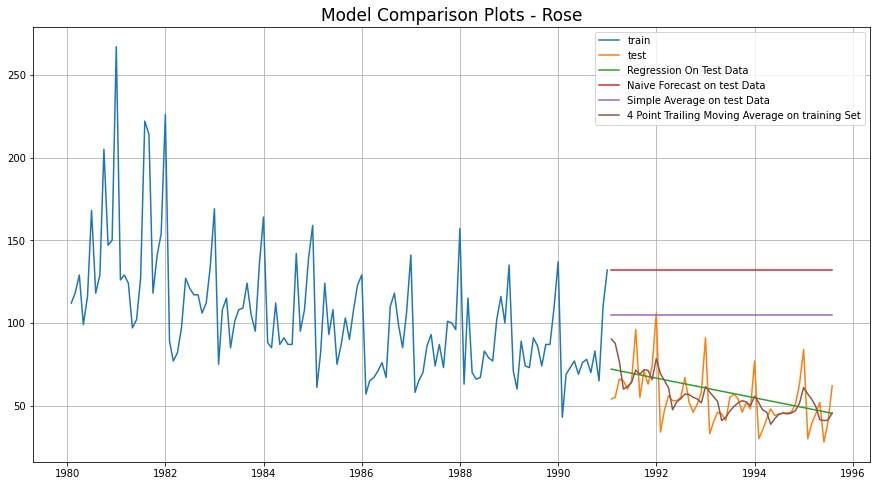

In [63]:
#Since we have built all the models now, lets visualize a consildated plots for all the above models.
plt.plot(rtrain['Rose'], label='train')
plt.plot(rtest['Rose'], label='test')

plt.plot(LR_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NM_test['naive'], label='Naive Forecast on test Data')

plt.plot(SA_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on training Set') #2point Trailing MovingAverage has the least RMSE value


plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose", fontsize=17)
plt.grid();

### Model 5 - Simple Exponential Smoothing

In [64]:
import statsmodels.tools.eval_measures as em
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [65]:
model_SES = SimpleExpSmoothing(rtrain,initialization_method='estimated' )
model_SES_autofit = model_SES.fit(optimized=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [66]:
model_SES_autofit.params

{'smoothing_level': 0.09874920899865502,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3871074301239,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
#Here, Python has optimized the smoothing level to be almost 0.1
SES_predict_rose = model_SES_autofit.forecast(steps=len(rtest))
SES_predict_rose

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-31    87.10498
1991-02-28    87.10498
1991-03-31    87.10498
1991-04-30    87.10498
1991-05-31    87.10498
1991-06-30    87.10498
1991-07-31    87.10498
1991-08-31    87.10498
1991-09-30    87.10498
1991-10-31    87.10498
1991-11-30    87.10498
1991-12-31    87.10498
1992-01-31    87.10498
1992-02-29    87.10498
1992-03-31    87.10498
1992-04-30    87.10498
1992-05-31    87.10498
1992-06-30    87.10498
1992-07-31    87.10498
1992-08-31    87.10498
1992-09-30    87.10498
1992-10-31    87.10498
1992-11-30    87.10498
1992-12-31    87.10498
1993-01-31    87.10498
1993-02-28    87.10498
1993-03-31    87.10498
1993-04-30    87.10498
1993-05-31    87.10498
1993-06-30    87.10498
1993-07-31    87.10498
1993-08-31    87.10498
1993-09-30    87.10498
1993-10-31    87.10498
1993-11-30    87.10498
1993-12-31    87.10498
1994-01-31    87.10498
1994-02-28    87.10498
1994-03-31    87.10498
1994-04-30    87.10498
1994-05-31    87.10498
1994-06-30    87.10498
1994-07-31    87.10498
1994-08-31 

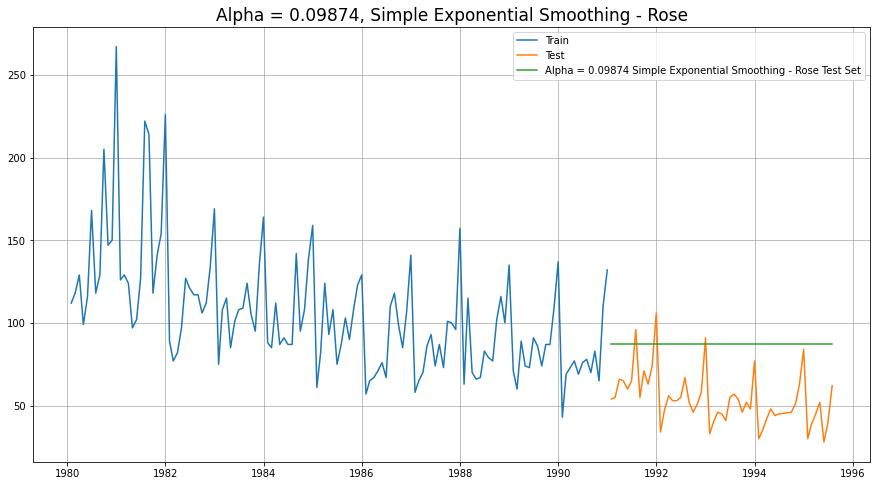

In [68]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing - Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);

In [69]:
#Model Evaluation
print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))

SES RMSE: 36.79622482462249


In [70]:
R_SES= pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,SES_predict_rose.values,squared=False)]},index=['Simple Exponential Smoothing'])
Result = pd.concat([Results, Results_21,resultsDf_31, resultsDf_41, R_SES], axis=0)
Result

Test RMSE Rose
Regression On Time                  15.268955
Naive Model                         79.718773
Simple Average Model                53.460570
4point Trailing MovingAverage       14.451403
6point Trailing MovingAverage       14.566327
9point Trailing MovingAverage       14.727630
Simple Exponential Smoothing        36.796225

#### Model 6 - Double Exponential Model

In [71]:
model_DES = Holt(rtrain,initialization_method='estimated' )
model_DES_autofit = model_DES.fit(optimized=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [72]:
model_DES_autofit.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 5.448169774560283e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81762949544608,
 'initial_trend': -0.4943507283995123,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
DES_predict_rose = model_DES_autofit.forecast(steps=len(rtest))
DES_predict_rose

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-31    72.068983
1991-02-28    71.574632
1991-03-31    71.080281
1991-04-30    70.585930
1991-05-31    70.091580
1991-06-30    69.597229
1991-07-31    69.102878
1991-08-31    68.608528
1991-09-30    68.114177
1991-10-31    67.619826
1991-11-30    67.125475
1991-12-31    66.631125
1992-01-31    66.136774
1992-02-29    65.642423
1992-03-31    65.148072
1992-04-30    64.653722
1992-05-31    64.159371
1992-06-30    63.665020
1992-07-31    63.170669
1992-08-31    62.676319
1992-09-30    62.181968
1992-10-31    61.687617
1992-11-30    61.193267
1992-12-31    60.698916
1993-01-31    60.204565
1993-02-28    59.710214
1993-03-31    59.215864
1993-04-30    58.721513
1993-05-31    58.227162
1993-06-30    57.732811
1993-07-31    57.238461
1993-08-31    56.744110
1993-09-30    56.249759
1993-10-31    55.755409
1993-11-30    55.261058
1993-12-31    54.766707
1994-01-31    54.272356
1994-02-28    53.778006
1994-03-31    53.283655
1994-04-30    52.789304
1994-05-31    52.294953
1994-06-30    51

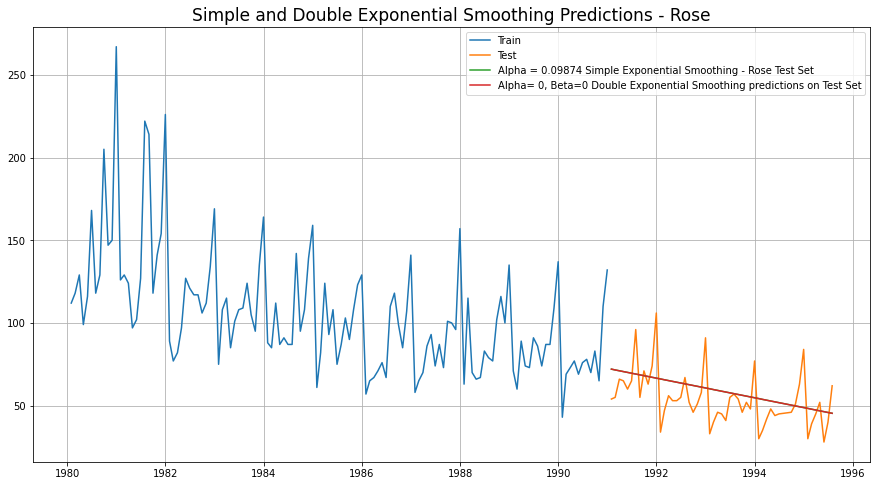

In [74]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(DES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing - Rose Test Set') #SES
plt.plot(DES_predict_rose, label='Alpha= 0, Beta=0 Double Exponential Smoothing predictions on Test Set') #DES

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose', fontsize=17);

In [75]:
#Model Evaluation
print('DES RMSE:',mean_squared_error(rtest.values,DES_predict_rose.values,squared=False))

DES RMSE: 15.27096843395306


In [76]:
R_DES= pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,DES_predict_rose.values,squared=False)]},index=['Double Exponential Smoothing'])
Result = pd.concat([Results, Results_21,resultsDf_31, resultsDf_41, R_SES, R_DES], axis=0)
Result

Test RMSE Rose
Regression On Time                  15.268955
Naive Model                         79.718773
Simple Average Model                53.460570
4point Trailing MovingAverage       14.451403
6point Trailing MovingAverage       14.566327
9point Trailing MovingAverage       14.727630
Simple Exponential Smoothing        36.796225
Double Exponential Smoothing        15.270968

#### Model 7 - Holt-Winter's Model (Exponential Smoothing) with additive errors

In [77]:
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES_autofit = model_TES.fit(optimized=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [78]:
model_TES_autofit.params

{'smoothing_level': 0.08491574907842013,
 'smoothing_trend': 5.5205494088745035e-06,
 'smoothing_seasonal': 0.0005477182208247348,
 'damping_trend': nan,
 'initial_level': 147.05898703809248,
 'initial_trend': -0.5496981430927392,
 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
        -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
          4.83969803,   2.95125217,  21.07934859,  63.31472515]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [79]:
TES_predict_rose = model_TES_autofit.forecast(steps=len(rtest))
TES_predict_rose

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-31     42.574560
1991-02-28     54.372099
1991-03-31     61.821511
1991-04-30     50.671639
1991-05-31     58.932400
1991-06-30     63.751320
1991-07-31     73.204015
1991-08-31     78.742349
1991-09-30     74.177124
1991-10-31     71.738917
1991-11-30     89.317129
1991-12-31    131.006255
1992-01-31     35.978169
1992-02-29     47.775707
1992-03-31     55.225119
1992-04-30     44.075248
1992-05-31     52.336008
1992-06-30     57.154928
1992-07-31     66.607623
1992-08-31     72.145958
1992-09-30     67.580733
1992-10-31     65.142526
1992-11-30     82.720737
1992-12-31    124.409864
1993-01-31     29.381777
1993-02-28     41.179316
1993-03-31     48.628728
1993-04-30     37.478856
1993-05-31     45.739616
1993-06-30     50.558536
1993-07-31     60.011232
1993-08-31     65.549566
1993-09-30     60.984341
1993-10-31     58.546134
1993-11-30     76.124346
1993-12-31    117.813472
1994-01-31     22.785386
1994-02-28     34.582924
1994-03-31     42.032336
1994-04-30     30.882464


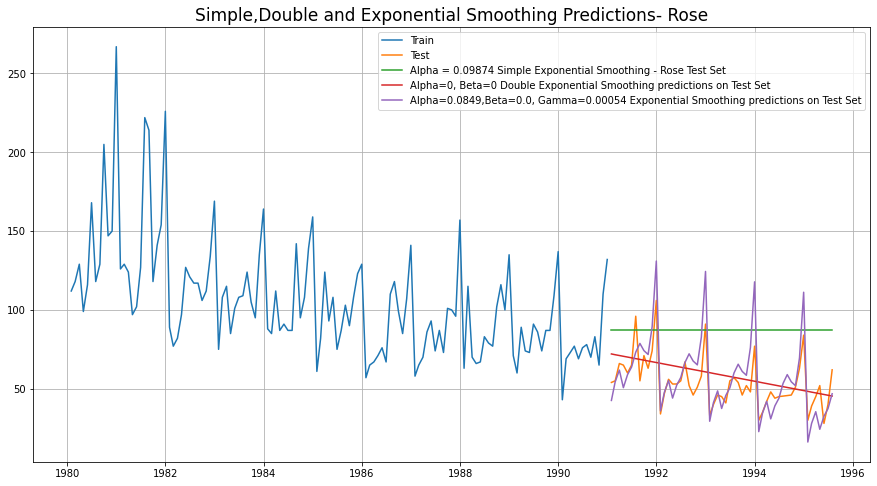

In [80]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing - Rose Test Set')
plt.plot(DES_predict_rose, label='Alpha=0, Beta=0 Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_rose, label='Alpha=0.0849,Beta=0.0, Gamma=0.00054 Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Exponential Smoothing Predictions- Rose', fontsize=17);

In [81]:
#Model Evaluation
print('TES RMSE:',mean_squared_error(rtest.values,TES_predict_rose.values,squared=False))

TES RMSE: 14.24323950074202


In [82]:
R_TES= pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_rose.values,squared=False)]},index=['Exponential Smoothing (Additive Seasonality)'])
Result = pd.concat([Results, Results_21,resultsDf_31, resultsDf_41,R_SES, R_DES, R_TES], axis=0)
Result

Test RMSE Rose
Regression On Time                                 15.268955
Naive Model                                        79.718773
Simple Average Model                               53.460570
4point Trailing MovingAverage                      14.451403
6point Trailing MovingAverage                      14.566327
9point Trailing MovingAverage                      14.727630
Simple Exponential Smoothing                       36.796225
Double Exponential Smoothing                       15.270968
Exponential Smoothing (Additive Seasonality)       14.243240

#### Model 8 - Holt-Winter's Model (Exponential Smoothing) with multiplicative seasonality

In [83]:
model_TES_M = ExponentialSmoothing(rtrain,trend='additive',seasonal='multiplicative',initialization_method='estimated')
model_TES_M_autofit = model_TES_M.fit(optimized=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [84]:
model_TES_M_autofit.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
TES_M_predict_rose = model_TES_M_autofit.forecast(steps=len(rtest))
TES_M_predict_rose

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-31     55.942246
1991-02-28     63.240624
1991-03-31     68.899674
1991-04-30     60.007486
1991-05-31     67.257150
1991-06-30     72.880875
1991-07-31     79.913317
1991-08-31     84.831135
1991-09-30     79.856761
1991-10-31     78.009465
1991-11-30     90.608817
1991-12-31    124.421985
1992-01-31     53.620022
1992-02-29     60.606323
1992-03-31     66.019647
1992-04-30     57.490388
1992-05-31     64.426058
1992-06-30     69.802261
1992-07-31     76.525716
1992-08-31     81.222314
1992-09-30     76.447471
1992-10-31     74.667150
1992-11-30     86.712771
1992-12-31    119.052784
1993-01-31     51.297798
1993-02-28     57.972023
1993-03-31     63.139621
1993-04-30     54.973289
1993-05-31     61.594966
1993-06-30     66.723648
1993-07-31     73.138115
1993-08-31     77.613494
1993-09-30     73.038180
1993-10-31     71.324834
1993-11-30     82.816725
1993-12-31    113.683583
1994-01-31     48.975574
1994-02-28     55.337723
1994-03-31     60.259594
1994-04-30     52.456191


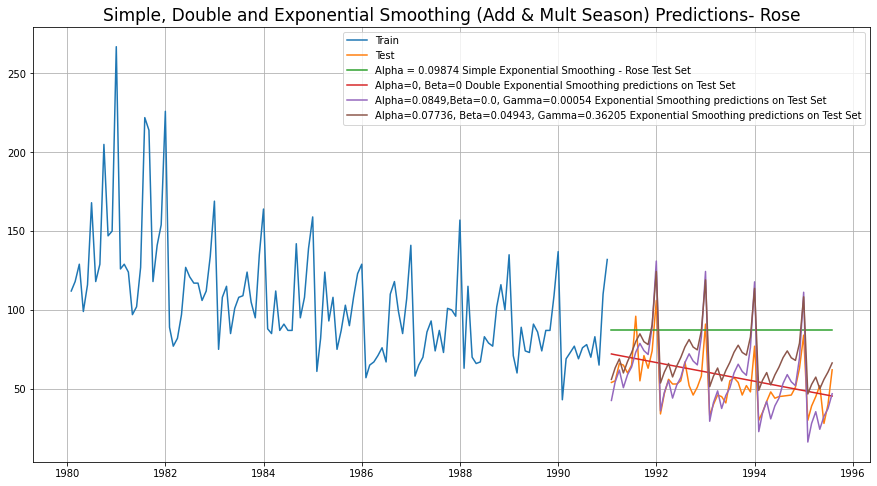

In [86]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing - Rose Test Set')
plt.plot(DES_predict_rose, label='Alpha=0, Beta=0 Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_rose, label='Alpha=0.0849,Beta=0.0, Gamma=0.00054 Exponential Smoothing predictions on Test Set')
plt.plot(TES_M_predict_rose, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205 Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple, Double and Exponential Smoothing (Add & Mult Season) Predictions- Rose', fontsize=17);

In [87]:
#Model Evaluation
print('TES M_RMSE:',mean_squared_error(rtest.values,TES_M_predict_rose.values,squared=False))

TES M_RMSE: 19.113110215160134


In [88]:
R_M_TES= pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_M_predict_rose.values,squared=False)]},index=['Exponential Smoothing (Multi Seasonality)'])
Result = pd.concat([Results, Results_21,resultsDf_31, resultsDf_41,R_SES, R_DES, R_TES, R_M_TES], axis=0)
Result

Test RMSE Rose
Regression On Time                                 15.268955
Naive Model                                        79.718773
Simple Average Model                               53.460570
4point Trailing MovingAverage                      14.451403
6point Trailing MovingAverage                      14.566327
9point Trailing MovingAverage                      14.727630
Simple Exponential Smoothing                       36.796225
Double Exponential Smoothing                       15.270968
Exponential Smoothing (Additive Seasonality)       14.243240
Exponential Smoothing (Multi Seasonality)          19.113110

### Check for stationarity of the whole Time Series data.
The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

1.   H0: The Time Series has a unit root and is thus non-stationary.
2.   H1:The Time Series does not have a unit root and is thus stationary

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α (0.05)
 value.

In [89]:
from statsmodels.tsa.stattools import adfuller

In [90]:
dftest = adfuller(df1, regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.240
DF test p-value is 0.46713716277931133
Number of lags used 13


In [91]:
#Since the p value is greater than 0.05, So Time Series is non-stationary.

#Let us take one level of differencing to see whether the series becomes stationary

dftest = adfuller(df1.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.162
DF test p-value is 3.015976115827714e-11
Number of lags used 12



1.   We see that p-value < alpha=0.05 Hence, the data is non-stationary
2.   We conclude that with a lag 1 - now the Rose data is Stationary. Now, let us go ahead and plot the stationary series.



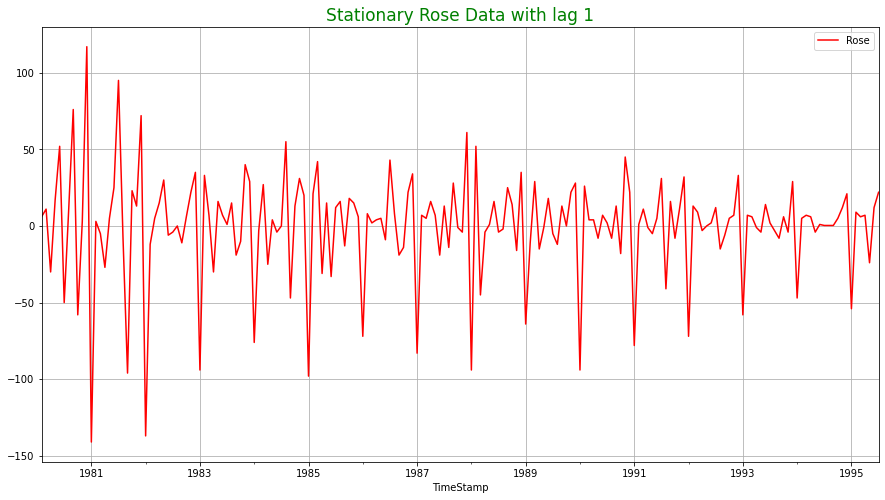

In [92]:
df1.diff().dropna().plot(grid=True, color='red');
plt.title('Stationary Rose Data with lag 1', color='green', fontsize=17);

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data

In [93]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

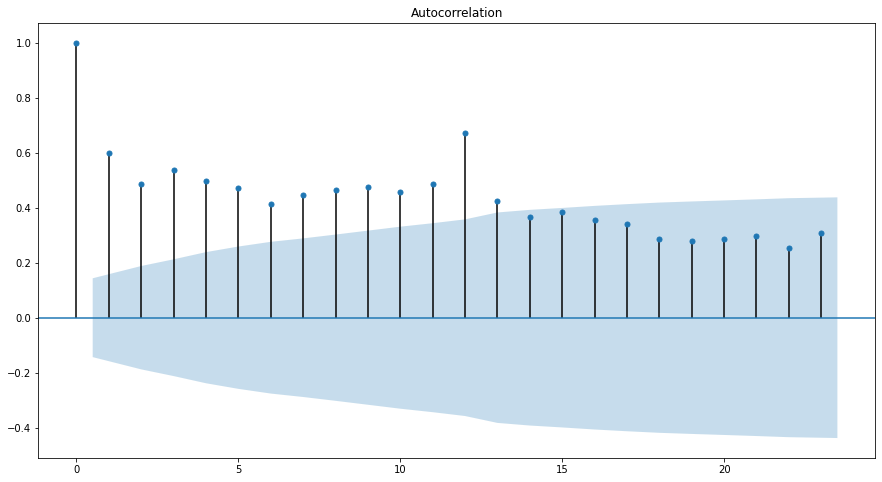

In [94]:
plot_acf(df1, alpha=0.05);

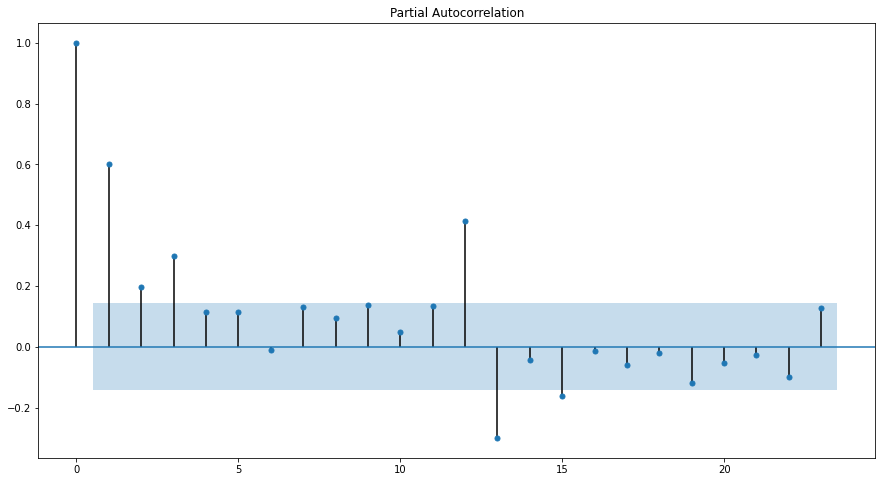

In [95]:
plot_pacf(df1, alpha=0.05, method='ywmle');

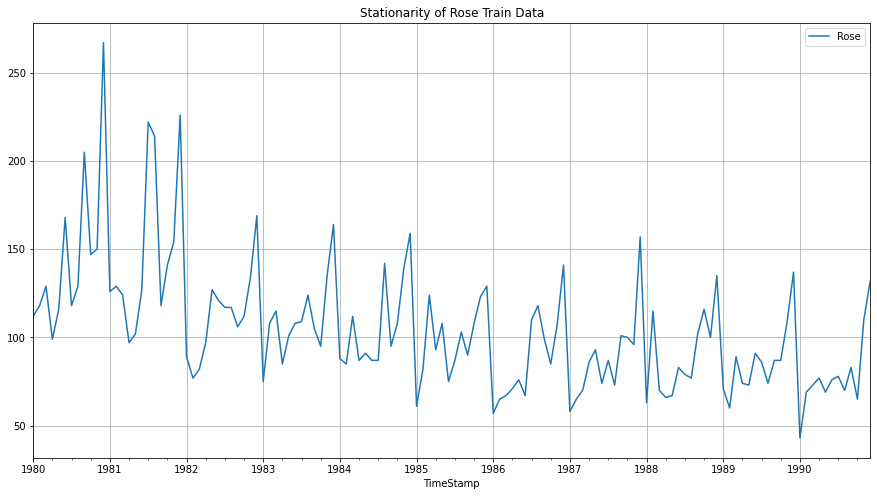

In [96]:
#Checking for stationarity of the Training Data Time Series
rtrain.plot(grid=True)
plt.title('Stationarity of Rose Train Data')
plt.show();

In [97]:
dftest = adfuller(rtrain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047098
Number of lags used 13


In [98]:
#Since the train data is non-stationary, lets take first level of differencing
dftest = adfuller(rtrain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356782849e-08
Number of lags used 12


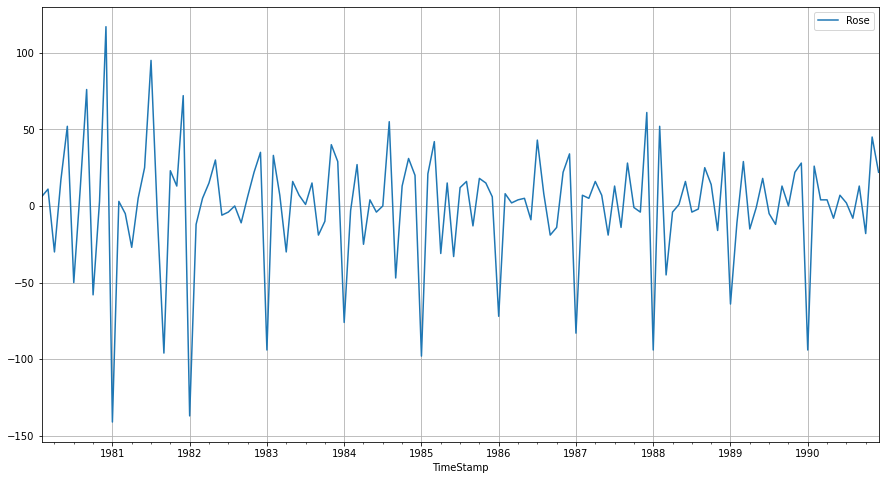

In [99]:
#The data is now stationary at 95% confidence.
rtrain.diff().dropna().plot(grid=True);

In [100]:
rtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


### Model 9 - Automated ARIMA Model

Now that our training data is stationary, let us build an automated version of ARIMA model and for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

Note: The data has some seasonality so ideally we should build a SARIMA model. But lets test on the lowest Akaike Information Criteria, which one suits best - ARIMA or SARIMA

In [101]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [102]:
# Creating an empty Dataframe with column names only
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [104]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(rtrain['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.309831974832
ARIMA(0, 1, 2) - AIC:1279.6715288535784
ARIMA(0, 1, 3) - AIC:1280.545376173466
ARIMA(1, 1, 0) - AIC:1317.350310538146
ARIMA(1, 1, 1) - AIC:1280.5742295380046
ARIMA(1, 1, 2) - AIC:1279.8707234231929
ARIMA(1, 1, 3) - AIC:1281.8707223309925
ARIMA(2, 1, 0) - AIC:1298.6110341604945
ARIMA(2, 1, 1) - AIC:1281.5078621868531
ARIMA(2, 1, 2) - AIC:1281.870722226456


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.695116226725
ARIMA(3, 1, 0) - AIC:1297.481091727167
ARIMA(3, 1, 1) - AIC:1282.4192776271927


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1283.7207405977094
ARIMA(3, 1, 3) - AIC:1278.6658665234413


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [105]:
ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.695116
15  (3, 1, 3)  1278.665867
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [106]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 19 Feb 2023   AIC                           1274.695
Time:                        15:00:49   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.050      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.710      0.000      -0.893      -0.565
ma.L1          1.0448      0.663      1.575      0.1

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


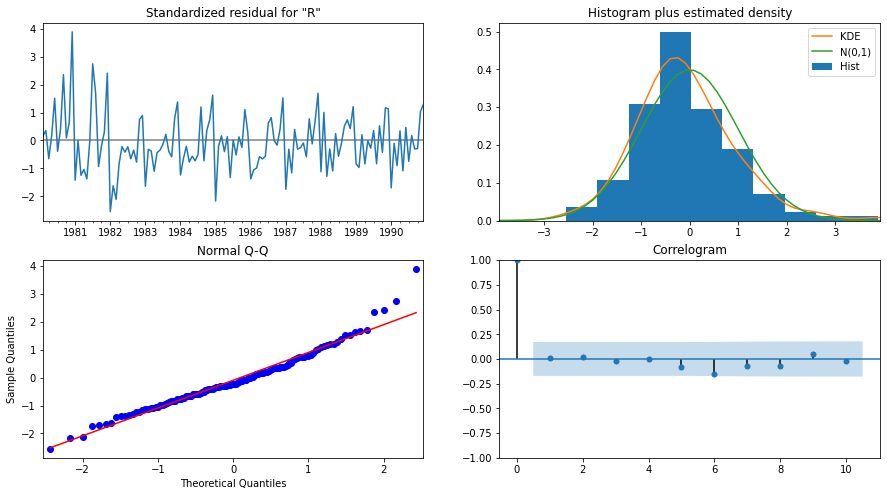

In [107]:
#Rose ARIMA Diagnostic plot
results_auto_ARIMA.plot_diagnostics();

In [108]:
#Prediction and Evaluation of ARIMA model on the Rose Test
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_auto_ARIMA

1991-01-31    85.624824
1991-02-28    90.524565
1991-03-31    81.975488
1991-04-30    92.749065
1991-05-31    80.902744
1991-06-30    92.927732
1991-07-31    81.384821
1991-08-31    91.988621
1991-09-30    82.609221
1991-10-31    90.618634
1991-11-30    84.015562
1991-12-31    89.257406
1992-01-31    85.274597
1992-02-29    88.136962
1992-03-31    86.236978
1992-04-30    87.338789
1992-05-31    86.874827
1992-06-30    86.850270
1992-07-31    87.229632
1992-08-31    86.610988
1992-09-30    87.372532
1992-10-31    86.545612
1992-11-30    87.378074
1992-12-31    86.583961
1993-01-31    87.309689
1993-02-28    86.670756
1993-03-31    87.213895
1993-04-30    86.768231
1993-05-31    87.120158
1993-06-30    86.854471
1993-07-31    87.043774
1993-08-31    86.919783
1993-09-30    86.989858
1993-10-31    86.962647
1993-11-30    86.957231
1993-12-31    86.986151
1994-01-31    86.941573
1994-02-28    86.995294
1994-03-31    86.937644
1994-04-30    86.995222
1994-05-31    86.940629
1994-06-30    86

In [109]:
#Model Evaluation
rmse = mean_squared_error(rtest['Rose'],predicted_auto_ARIMA,squared=False)
rmse

36.8157504974066

In [110]:
R_ARIMA= pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,predicted_auto_ARIMA.values,squared=False)]},index=['ARIMA (2, 1, 3)'])
Result = pd.concat([Results, Results_21,resultsDf_31, resultsDf_41,R_SES, R_DES, R_TES, R_ARIMA], axis=0)
Result

Test RMSE Rose
Regression On Time                                 15.268955
Naive Model                                        79.718773
Simple Average Model                               53.460570
4point Trailing MovingAverage                      14.451403
6point Trailing MovingAverage                      14.566327
9point Trailing MovingAverage                      14.727630
Simple Exponential Smoothing                       36.796225
Double Exponential Smoothing                       15.270968
Exponential Smoothing (Additive Seasonality)       14.243240
ARIMA (2, 1, 3)                                    36.815750

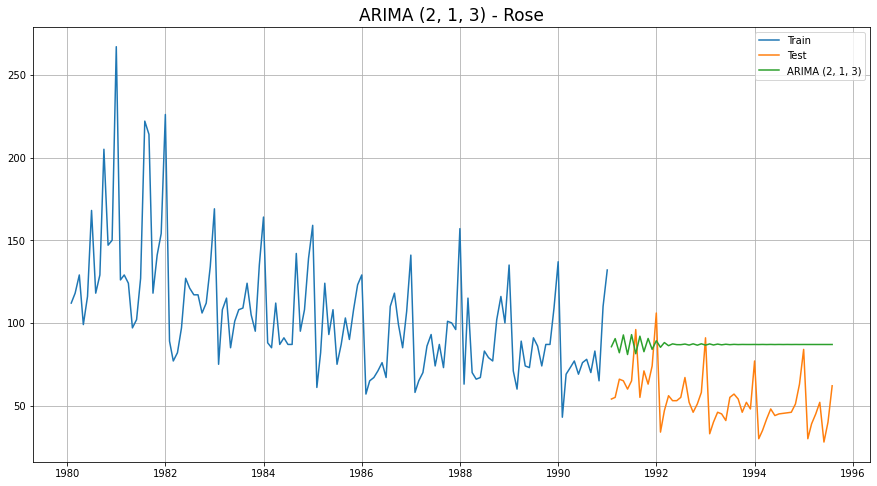

In [111]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

#### Model 10 - Manual ARIMA

Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

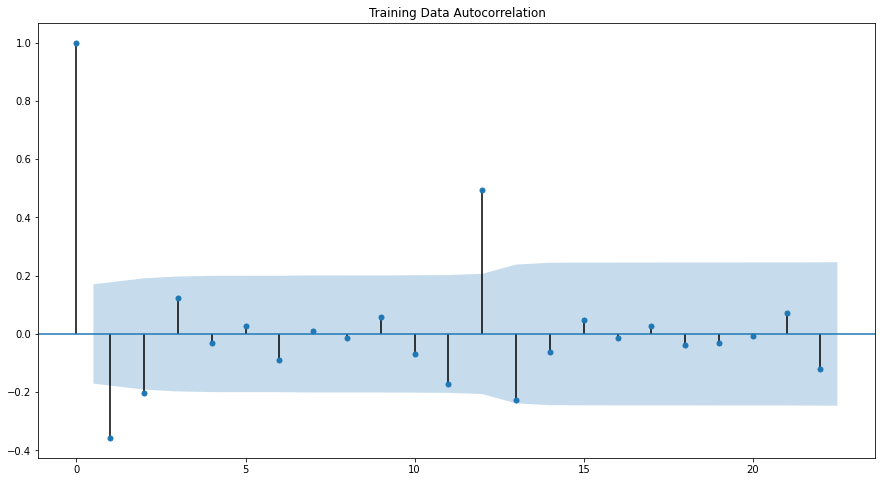

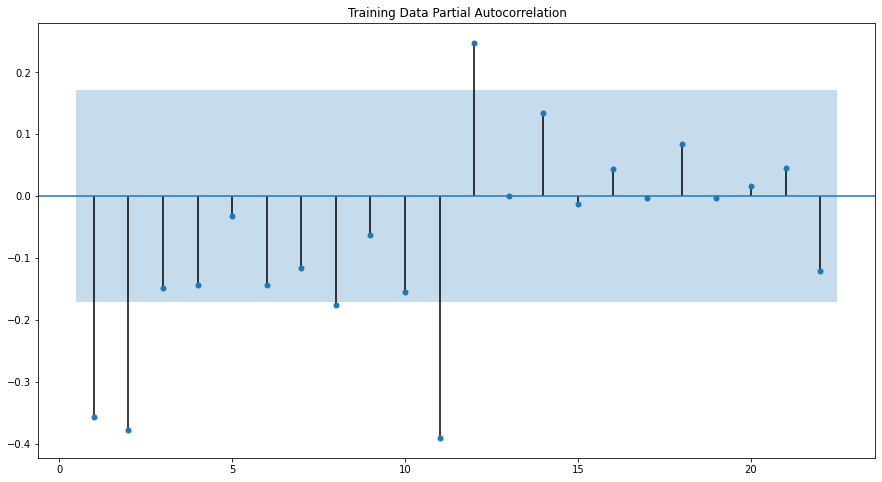

In [112]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.
By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [113]:
RManual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2),freq='M')

results_manual_ARIMA = RManual_ARIMA.fit()

print(results_manual_ARIMA.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 19 Feb 2023   AIC                           1281.871
Time:                        15:01:13   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

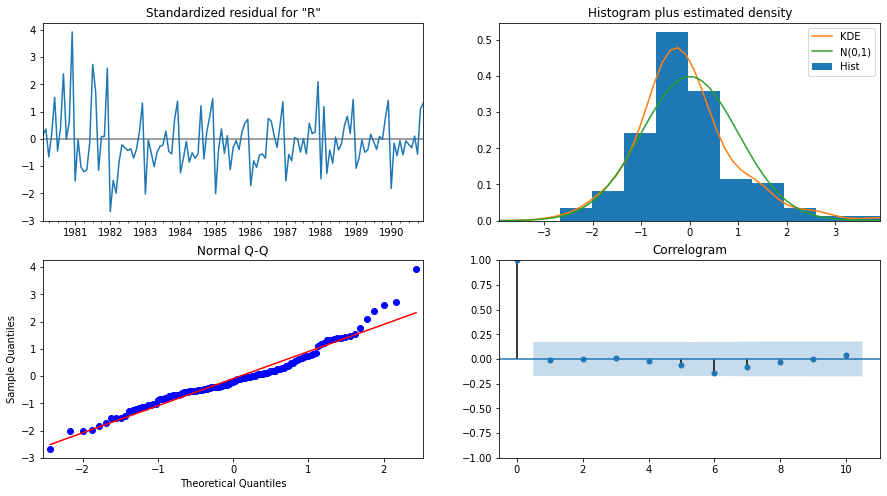

In [114]:
#Rose Manual ARIMA Diagnostic plot
results_manual_ARIMA.plot_diagnostics();

In [115]:
#Prediction and Evaluation of Manual ARIMA model on the Rose Test
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))
predicted_manual_ARIMA

1991-01-31    91.159512
1991-02-28    85.314628
1991-03-31    87.962468
1991-04-30    86.759563
1991-05-31    87.306038
1991-06-30    87.057777
1991-07-31    87.170561
1991-08-31    87.119324
1991-09-30    87.142601
1991-10-31    87.132026
1991-11-30    87.136830
1991-12-31    87.134648
1992-01-31    87.135639
1992-02-29    87.135189
1992-03-31    87.135393
1992-04-30    87.135300
1992-05-31    87.135342
1992-06-30    87.135323
1992-07-31    87.135332
1992-08-31    87.135328
1992-09-30    87.135330
1992-10-31    87.135329
1992-11-30    87.135329
1992-12-31    87.135329
1993-01-31    87.135329
1993-02-28    87.135329
1993-03-31    87.135329
1993-04-30    87.135329
1993-05-31    87.135329
1993-06-30    87.135329
1993-07-31    87.135329
1993-08-31    87.135329
1993-09-30    87.135329
1993-10-31    87.135329
1993-11-30    87.135329
1993-12-31    87.135329
1994-01-31    87.135329
1994-02-28    87.135329
1994-03-31    87.135329
1994-04-30    87.135329
1994-05-31    87.135329
1994-06-30    87

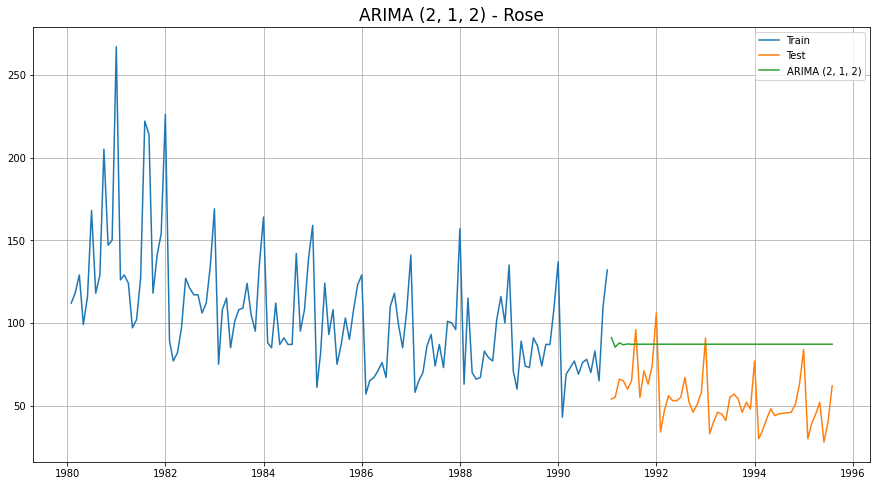

In [116]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(predicted_manual_ARIMA,label='ARIMA (2, 1, 2)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 2) - Rose', fontsize=17);

In [117]:
#Model Evaluation
rmse = mean_squared_error(rtest['Rose'],predicted_manual_ARIMA,squared=False)
rmse

36.87119661282404

In [118]:
RM_ARIMA= pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,predicted_manual_ARIMA.values,squared=False)]},index=['ARIMA (2, 1, 2)'])
Result = pd.concat([Results, Results_21,resultsDf_31, resultsDf_41,R_SES, R_DES, R_TES, R_ARIMA, RM_ARIMA], axis=0)
Result

Test RMSE Rose
Regression On Time                                 15.268955
Naive Model                                        79.718773
Simple Average Model                               53.460570
4point Trailing MovingAverage                      14.451403
6point Trailing MovingAverage                      14.566327
9point Trailing MovingAverage                      14.727630
Simple Exponential Smoothing                       36.796225
Double Exponential Smoothing                       15.270968
Exponential Smoothing (Additive Seasonality)       14.243240
ARIMA (2, 1, 3)                                    36.815750
ARIMA (2, 1, 2)                                    36.871197

#### Model 11 - Automated SARIMA Model
Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

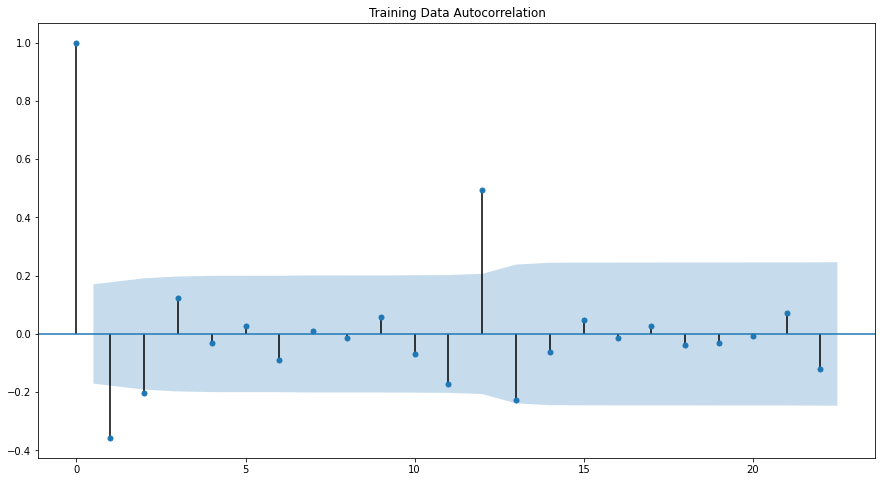

In [119]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation',missing='drop');

In [120]:
#We can see that there is a seasonality. Lets build the models now.
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [121]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [122]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param, seasonal_order= param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207305
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380896


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:5657.668871149027
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386618
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635749904
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3721.867211816922
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697556
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894576


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3582.2908008011873
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702704327
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136127913


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:4198.133693969068
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918332
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383724


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:5095.544136794555
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491823
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094669
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483307634


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:1682.2313665876138
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535833
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461674
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.198826376204


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3551.9731065414585
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.588976481104
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844932624851
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269407945


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3681.5729995253246
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541054
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.486697526488
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617702


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:5246.51278476465
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341428
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.540093353393
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913556734


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:1064.3723770691263
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257989
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545053706
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679446


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2664.057798490063
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189374697
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080533656
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528411799


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2565.500345671512
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739145
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646082332
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380606


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:4937.351791419548
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.2051361212302
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212938513
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.836252333953


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2107.0556300988633
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987086
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996888128
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788251832
SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3414.6203333012495
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124752912
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772327602
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150720440996


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3243.3274544603
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.295544758572
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257689


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:5174.5612145755
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680456
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055024579
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948429
SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3786.1557964997796
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778663985
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661062
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.297310307097


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3383.473412024577
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272592
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573636
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086846555


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3517.222603877589
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255503
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.317270864084
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063865


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:4883.788858466223
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965031748
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135733
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428508954


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:1079.3867520594226
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060840378
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470647
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936852


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3656.6457593915825
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439384573
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447840509
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850258424
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3787.1436345578877
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.949504070617
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928101145
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938402266794
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:5022.195215979791
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760922460045
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.618321137359
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.731850054817


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:648.9062830853043
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196871572
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597852305193
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:889.9026930942325
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3620.3881701194696
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.0073801465002
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312809311767
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390285489417


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3672.3506593183456
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.546312531617
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849786190093
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105103769


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:4945.322099260502
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.328148767652
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950956157825
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232291647658


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687612745111
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955659140558
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886592850265


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2700.091718835037
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903134695203
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310148951504
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467926828956


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3602.471170256484
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.7773704711058
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829953


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:5717.165638876571
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575928
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.786319864119
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165558931


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3671.117025750238
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645402
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801383919
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280811
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3457.490280817877
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536407408771
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.04726379032
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.498819137167


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:4039.904022116807
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231796842
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949393
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472069263


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:5024.169945999942
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101383
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471203428
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822491
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:16.0
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608130525
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.639956536966
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866287173


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3183.2405126820718
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600252383
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259055058
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598887600397


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3417.7354658783083
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.910211614671
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598213
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311117862


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:5243.830318979048
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713679516
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354986324
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488800769


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:1612.2238650748786
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464452657485
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781891239004
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687982790429


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3200.3048228420616
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.119971221584
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035321633
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640484832709


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3343.4503192015677
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8701385520603
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073333340687
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349312928933


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:5163.582071814171
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.256321742816
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0461970545261
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483354056877


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3914.681252723157
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301560023
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328105349662
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191808327938


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3648.260275334495
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.407420813473
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101470260032
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452522431676


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3696.371612346732
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641505
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042224
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118005


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:5235.602726866031
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468456726312
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726786127
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304919


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3709.066124338404
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197997601
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976517
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472879
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3698.7009558797613
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701526448
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167662243
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017205202


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3680.1826911734233
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709358
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641212332
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547273
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:5386.8024324415655
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.614913651351
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837554631712
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384297


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:4604.805891211841
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459898237
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.327920853764
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523241407


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:2818.0023789138736
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990451167
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300791815
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002855566214


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3901.921600637411
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835652578943
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.709240092458
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980111283935


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3823.7288099632437
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211471928
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.126051801842
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875090586929


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3737.3131013595903
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3186393685197
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.327744124639
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1455019217683


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3269.1415569319097
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505639777589
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462392484412
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.880934877151
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3904.1040999463357
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385961453126
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397657858775
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.33402003471


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:5020.081374626554
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8459728719663
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.766238012144
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.048367322693


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:22.0
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.046371176397
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217096958613
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.559562204211


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:2576.3027023986665
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610184778869
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690413993687
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316169077463


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3672.8844808487024


In [123]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
151  (2, 1, 1)  (1, 0, 3, 12)   16.000000
119  (1, 1, 3)  (1, 0, 3, 12)   18.000000
247  (3, 1, 3)  (1, 0, 3, 12)   22.000000
103  (1, 1, 2)  (1, 0, 3, 12)  648.906283
222  (3, 1, 1)  (3, 0, 2, 12)  774.400286

In [124]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2, 1, 1),
                                seasonal_order=(1, 0, 3, 12),
                                enforce_stationarity=False,)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                         SARIMAX Results                                          
Dep. Variable:                                       Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -385.382
Date:                                    Sun, 19 Feb 2023   AIC                            786.765
Time:                                            15:17:03   BIC                            807.026
Sample:                                        01-31-1980   HQIC                           794.946
                                             - 12-31-1990                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0912      0.136      0.670      0

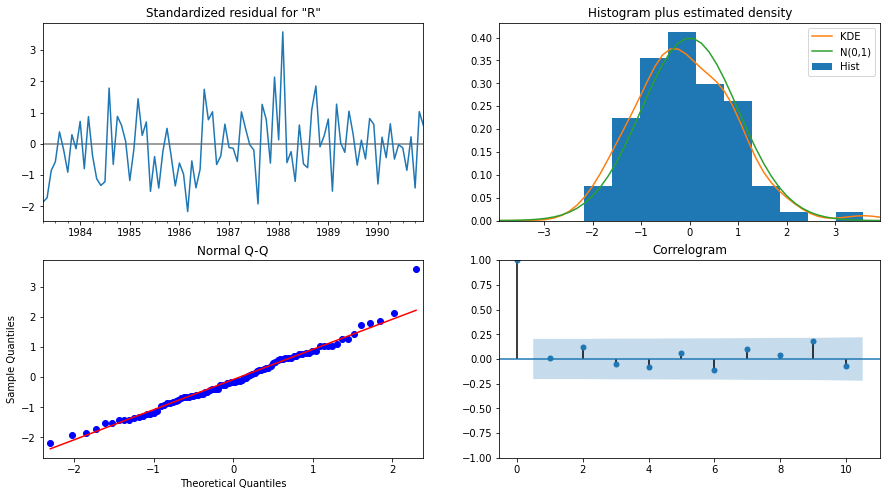

In [125]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

In [126]:
#Prediction on Test Data (Auto SARIMA Model)
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(rtest))
predicted_auto_SARIMA1= results_auto_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)
predicted_auto_SARIMA1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [127]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  52.244928  14.173044      24.466273      80.023582
1991-02-28  61.863465  14.227519      33.978041      89.748889
1991-03-31  72.109381  14.257795      44.164617     100.054145
1991-04-30  68.639136  14.249170      40.711276      96.566995
1991-05-31  72.174240  14.251979      44.240874     100.107607

In [128]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
rmse

19.003214330912698

In [129]:
R_SARIMA= pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,predicted_auto_SARIMA.predicted_mean,squared=False)]},index=['SARIMA (2, 1, 1) (1, 0, 3, 12)'])
Result = pd.concat([Results, Results_21,resultsDf_31, resultsDf_41,R_SES, R_DES, R_TES, R_ARIMA, RM_ARIMA, R_SARIMA], axis=0)
Result

Test RMSE Rose
Regression On Time                                 15.268955
Naive Model                                        79.718773
Simple Average Model                               53.460570
4point Trailing MovingAverage                      14.451403
6point Trailing MovingAverage                      14.566327
9point Trailing MovingAverage                      14.727630
Simple Exponential Smoothing                       36.796225
Double Exponential Smoothing                       15.270968
Exponential Smoothing (Additive Seasonality)       14.243240
ARIMA (2, 1, 3)                                    36.815750
ARIMA (2, 1, 2)                                    36.871197
SARIMA (2, 1, 1) (1, 0, 3, 12)                     19.003214

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


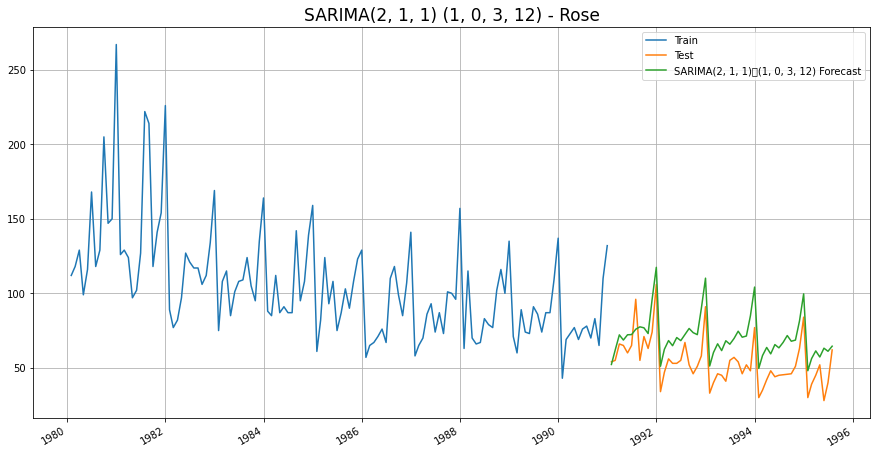

In [130]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(2, 1, 1)	(1, 0, 3, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(2, 1, 1) (1, 0, 3, 12) - Rose', fontsize=17);

#### Model 12 - Manual SARIMA Model

Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots - Seasonality at 12

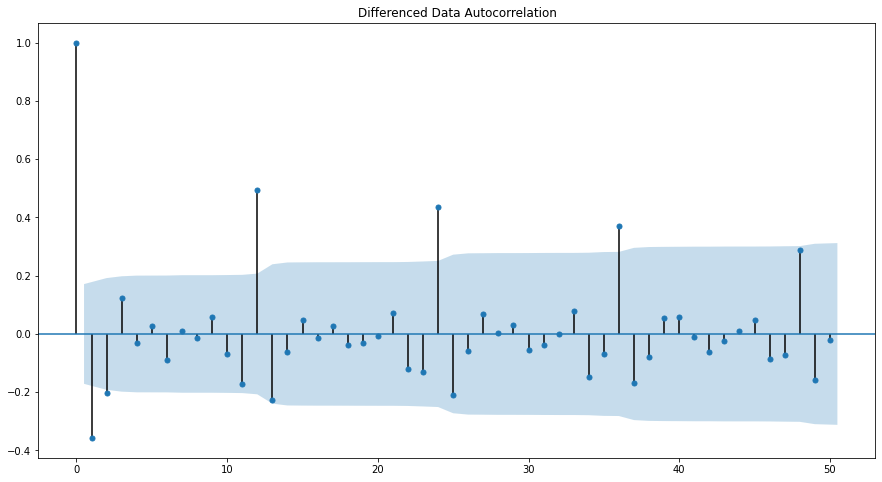

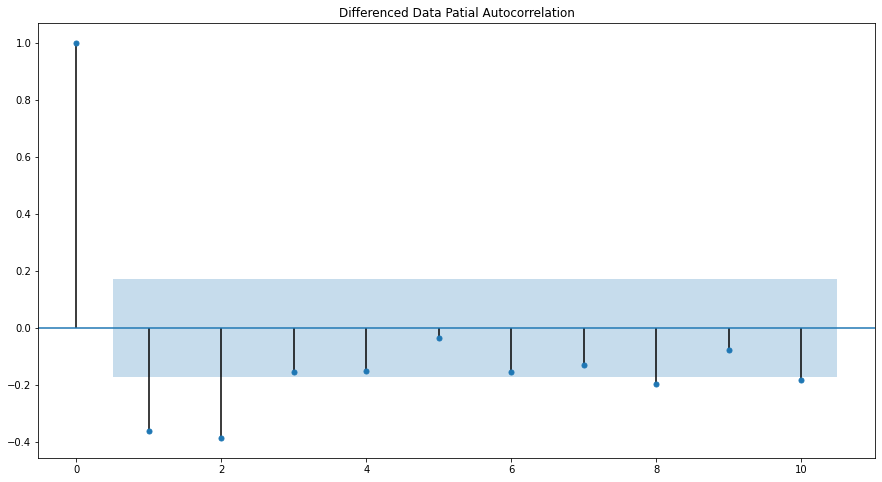

In [131]:
#Let us look at the ACF and the PACF plots once more.
plot_acf(rtrain['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rtrain['Rose'].diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show();

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

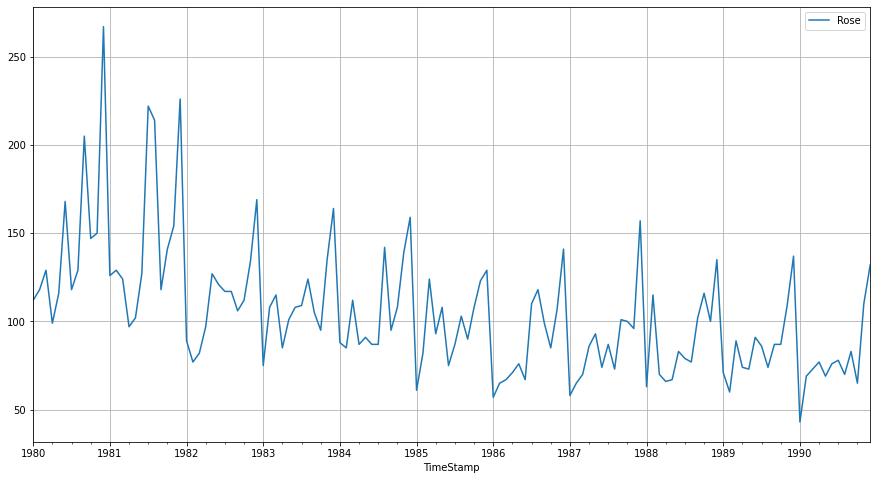

In [132]:
rtrain.plot()
plt.grid();

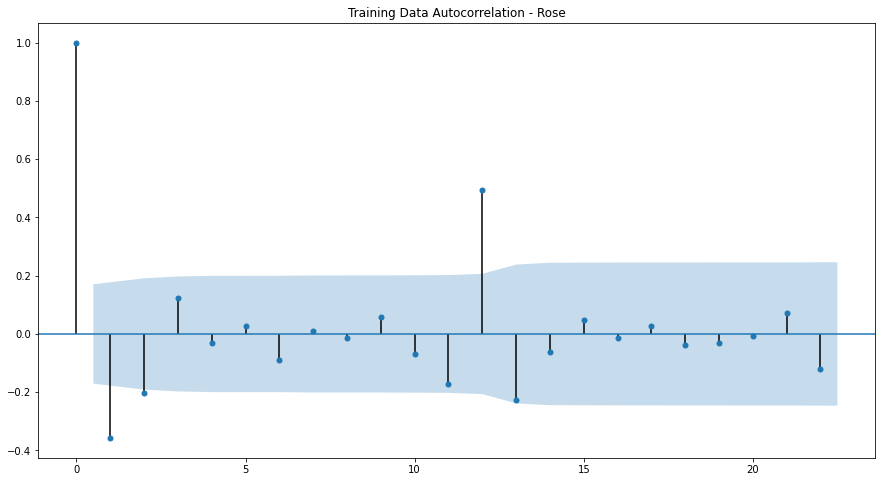

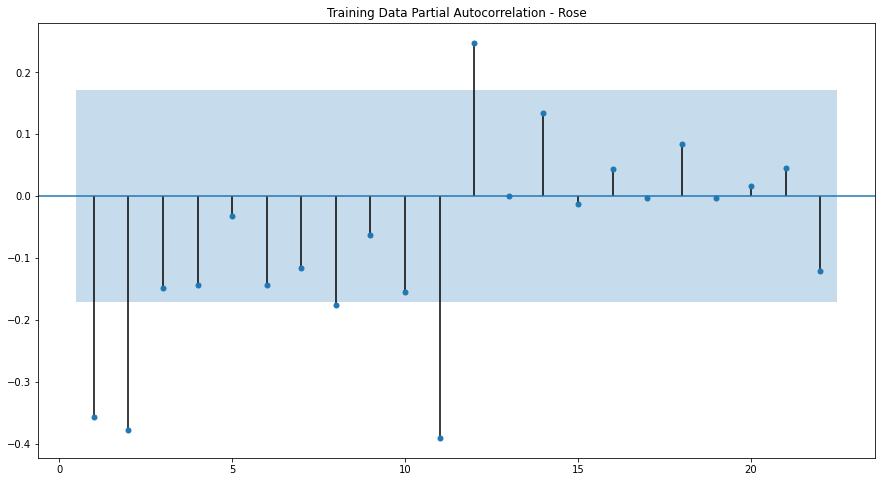

In [133]:
#We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');
plt.show();

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12 We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 2.
The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

In [134]:
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 3, 12),
                                enforce_stationarity=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -330.100
Date:                                    Sun, 19 Feb 2023   AIC                            680.201
Time:                                            15:17:42   BIC                            704.021
Sample:                                                 0   HQIC                           689.751
                                                    - 132                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8307      0.175     -4.755      0

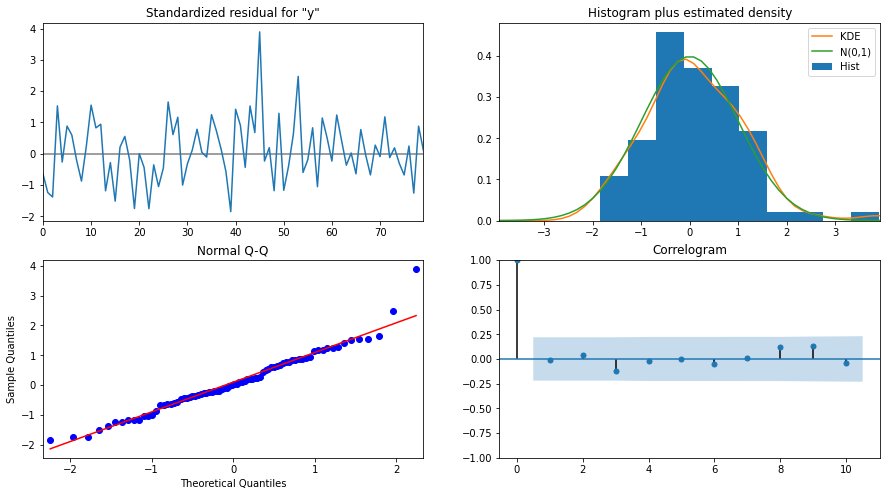

In [135]:
results_manual_SARIMA_rose.plot_diagnostics();

In [136]:
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.get_forecast(steps=len(rtest))

In [137]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA_rose.predicted_mean,squared=False)
rmse

14.799237435365765

In [138]:
SARIMA_test=rtest.copy()
SARIMA_test['rose_manual_forecasted'] = predicted_manual_SARIMA_rose.predicted_mean
SARIMA_test.head()

Rose  rose_manual_forecasted
TimeStamp                               
1991-01-31  54.0               40.547685
1991-02-28  55.0               52.028218
1991-03-31  66.0               65.301574
1991-04-30  65.0               64.903977
1991-05-31  60.0               65.882613

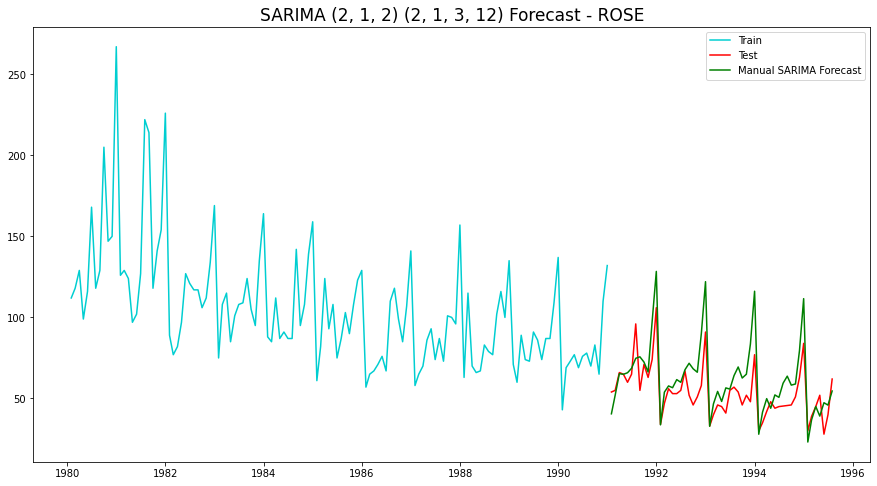

In [139]:
plt.plot(rtrain['Rose'], label='Train', color = 'darkturquoise')
plt.plot(rtest['Rose'], label='Test', color = 'red')

plt.plot(SARIMA_test['rose_manual_forecasted'], color='green', label='Manual SARIMA Forecast')
plt.title('SARIMA (2, 1, 2) (2, 1, 3, 12) Forecast - ROSE', fontsize=17)
plt.legend(loc='best')

In [140]:
R_manual_SARIMA= pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,predicted_manual_SARIMA_rose.predicted_mean,squared=False)]},index=['SARIMA (2, 1, 2) (2, 1, 3, 12)'])
Result = pd.concat([Results, Results_21,resultsDf_31, resultsDf_41,R_SES, R_DES, R_TES, R_ARIMA, RM_ARIMA, R_SARIMA, R_manual_SARIMA], axis=0)
Result

Test RMSE Rose
Regression On Time                                 15.268955
Naive Model                                        79.718773
Simple Average Model                               53.460570
4point Trailing MovingAverage                      14.451403
6point Trailing MovingAverage                      14.566327
9point Trailing MovingAverage                      14.727630
Simple Exponential Smoothing                       36.796225
Double Exponential Smoothing                       15.270968
Exponential Smoothing (Additive Seasonality)       14.243240
ARIMA (2, 1, 3)                                    36.815750
ARIMA (2, 1, 2)                                    36.871197
SARIMA (2, 1, 1) (1, 0, 3, 12)                     19.003214
SARIMA (2, 1, 2) (2, 1, 3, 12)                     14.799237

## Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [141]:
Result.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose
Exponential Smoothing (Additive Seasonality)       14.243240
4point Trailing MovingAverage                      14.451403
6point Trailing MovingAverage                      14.566327
9point Trailing MovingAverage                      14.727630
SARIMA (2, 1, 2) (2, 1, 3, 12)                     14.799237
Regression On Time                                 15.268955
Double Exponential Smoothing                       15.270968
SARIMA (2, 1, 1) (1, 0, 3, 12)                     19.003214
Simple Exponential Smoothing                       36.796225
ARIMA (2, 1, 3)                                    36.815750
ARIMA (2, 1, 2)                                    36.871197
Simple Average Model                               53.460570
Naive Model                                        79.718773

### Best Model for ROSE with Least RMSE - Exponential Smoothing (Additive Seasonality)	

In [143]:
ES_Ad = ExponentialSmoothing(df1, trend='add',seasonal='additive',initialization_method='estimated', damped_trend=False)
ES_Ad_fit = ES_Ad.fit(optimized=True)

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters')
print('')
print(ES_Ad_fit.params)


Holt Winters model Exponential Smoothing Estimated Parameters

{'smoothing_level': 0.09735117361719348, 'smoothing_trend': 5.507629753484272e-06, 'smoothing_seasonal': 0.0002767929725687986, 'damping_trend': nan, 'initial_level': 145.48998105259932, 'initial_trend': -0.53700374713204, 'initial_seasons': array([-28.14126307, -17.20156253,  -9.04796115, -15.68849474,
       -11.76246934,  -5.79244325,   5.28480569,   5.30230053,
         2.3165333 ,   2.29373567,  17.61244964,  55.0886928 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [144]:
# Forecasting using this model for the duration of the test set
TES_predict =  ES_Ad_fit.forecast(steps=12)
TES_predict
prediction_1 = TES_predict
TES_predict.to_csv('rose_forecast_tes.csv')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [145]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(ES_Ad_fit.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(ES_Ad_fit.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-31  15.305048   50.020850   84.736652
1995-09-30  11.783751   46.499553   81.215355
1995-10-31  11.220903   45.936706   80.652508
1995-11-30  26.002003   60.717805   95.433607
1995-12-31  62.946896   97.662698  132.378500

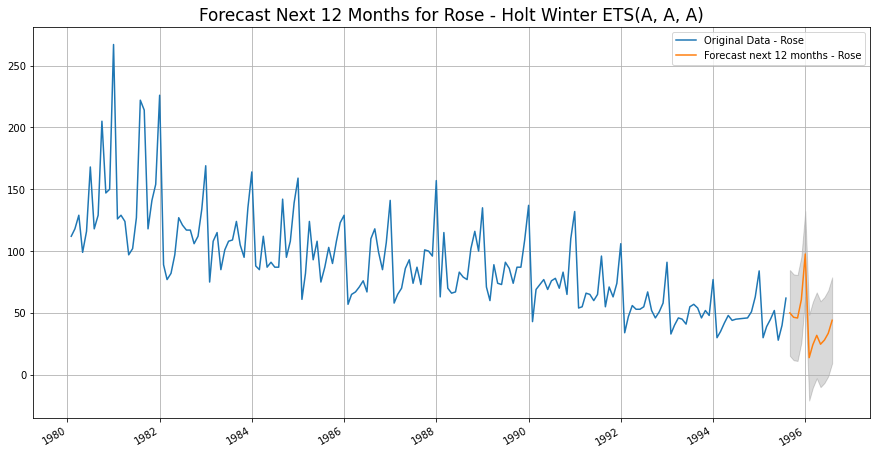

In [146]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(df1['Rose'], label='Original Data - Rose')

ax =TES_predict.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - Holt Winter ETS(A, A, A)', fontsize=17);

# Dataset - Sparkling

In [157]:
path2=('/content/drive/MyDrive/Sparkling.csv')
df2=pd.read_csv(path2)
df2.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [158]:
df2.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

## Exploratory Data Analysis

In [159]:
df2.dtypes

YearMonth    object
Sparkling     int64
dtype: object

### Treating the dataset for ease:
Since we have monthly data for years starting from 1980 to 1995 combined, let us draw a date range and incoporate as "TimeStamp" and drop "YearMonth" for ease

In [160]:
date=pd.date_range(start='01/01/1980', end='08/01/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [161]:
df2['TimeStamp']=pd.DataFrame(date, columns=['Month'])
df2.head()

YearMonth  Sparkling  TimeStamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [162]:
df2['TimeStamp']=pd.to_datetime(df2['TimeStamp'])
df2=df2.set_index('TimeStamp')
df2.drop(['YearMonth'], axis=1, inplace=True)
df2.head()

Sparkling
TimeStamp            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

### Basic details and Descriptive Statistics of Sparkling 

In [163]:
print("The number of rows: ",df2.shape[0], "\n""The number of columns: ",df2.shape[1])

The number of rows:  187 
The number of columns:  1


In [164]:
np.round(df2.describe(),2).T

count     mean      std     min     25%     50%     75%     max
Sparkling  187.0  2402.42  1295.11  1070.0  1605.0  1874.0  2549.0  7242.0

#### Checking for missing values and Interpolation

In [165]:
df2.isna().sum()

Sparkling    0
dtype: int64

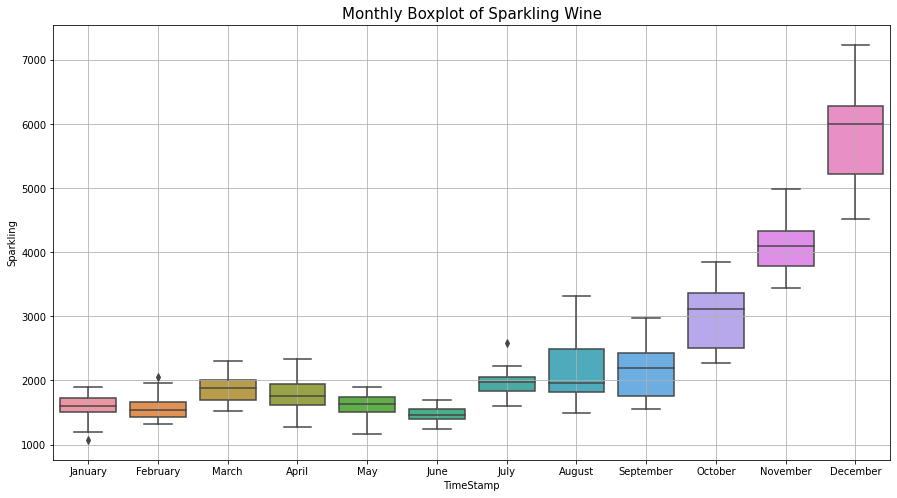

In [166]:
rcParams['figure.figsize']=15,8
sns.boxplot(x = df2.index.month_name(), y = df2['Sparkling']);
plt.grid();
plt.title('Monthly Boxplot of Sparkling Wine', fontsize=15);

In [167]:
monthly_sales_across_years_Sparkling = pd.pivot_table(df2, values = 'Sparkling', columns = df2.index.month, index = df2.index.year)
monthly_sales_across_years_Sparkling

TimeStamp      1       2       3       4       5       6       7       8   \
TimeStamp                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

TimeStamp      9       10      11      12  
TimeStamp                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

Text(0.5, 1.0, 'Monthly sales over years of Sparkling Wine')

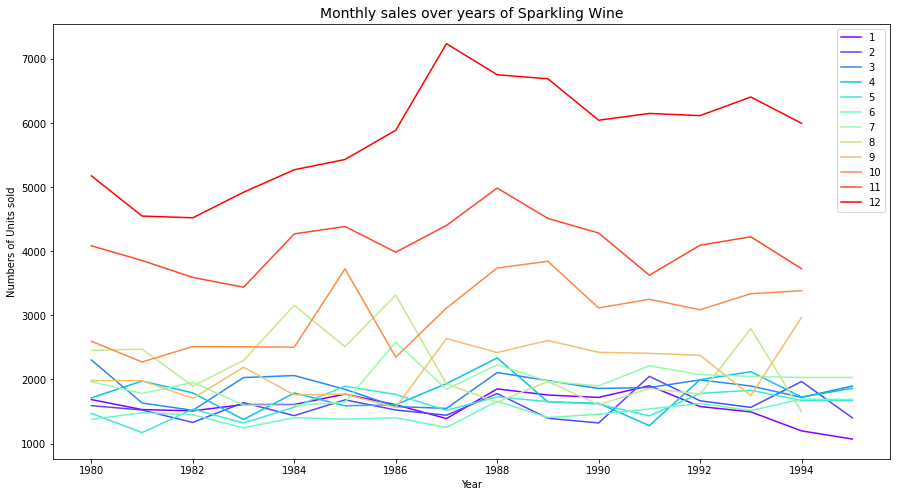

In [168]:
plt.figure.figsize=(15,8)
monthly_sales_across_years_Sparkling.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Numbers of Units sold')
plt.xlabel('Year')
plt.title('Monthly sales over years of Sparkling Wine', fontsize=14)

### Visualization of Time Series in Rose

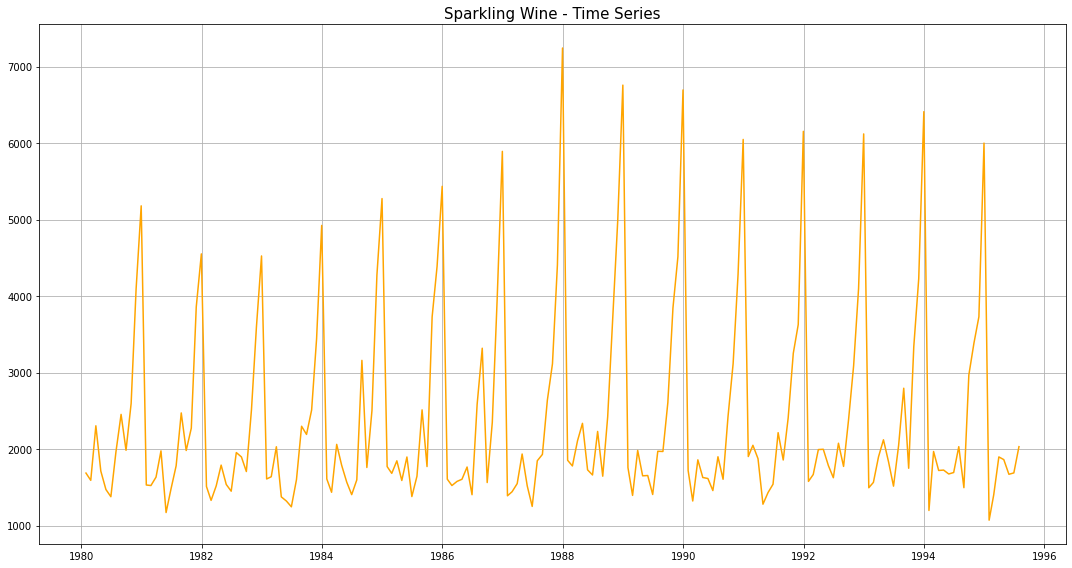

In [169]:
rcParams['figure.figsize']=15,8
plt.grid();
plt.title('Sparkling Wine - Time Series', fontsize=15);
plt.plot(df2, color='orange')
plt.tight_layout();

### Decompose the Time Series and plot the different components.

#### Additive Decomposition of Sparkling

In [170]:
from statsmodels.tsa.seasonal import seasonal_decompose

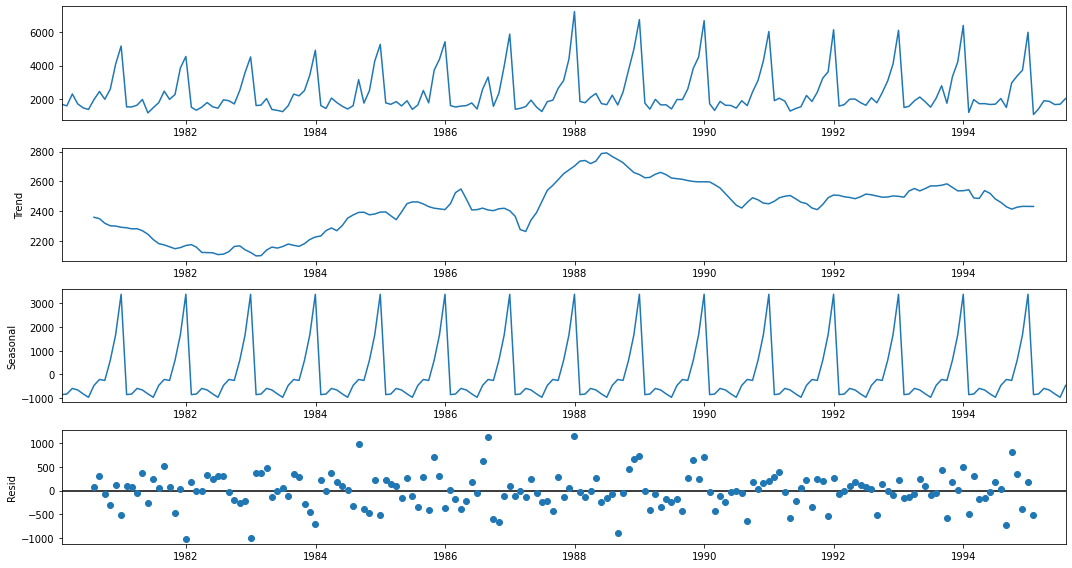

In [171]:
df2_decompose = seasonal_decompose(df2, model='additive', period=12) #since here we are considering yearly seasonality and trend having monthly freq
df2_decompose.plot()
plt.tight_layout()
plt.show();

In [172]:
S_Trend=df2_decompose.trend
S_Seasonality=df2_decompose.seasonal
S_Residual=df2_decompose.resid

print ('S_Trend', S_Trend.head(10), '\n')
print ('S_Seasonality', S_Seasonality.head(10), '\n')
print ('S_Residual', S_Residual.head(10), '\n')

S_Trend TimeStamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
Name: trend, dtype: float64 

S_Seasonality TimeStamp
1980-01-31   -854.260599
1980-02-29   -830.350678
1980-03-31   -592.356630
1980-04-30   -658.490559
1980-05-31   -824.416154
1980-06-30   -967.434011
1980-07-31   -465.502265
1980-08-31   -214.332821
1980-09-30   -254.677265
1980-10-31    599.769957
Name: seasonal, dtype: float64 

S_Residual TimeStamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290
Name: resid, dtype: float64 



In [173]:
S_Trend.head(12).to_csv('Sparkling_trend.csv')
S_Seasonality.head(12).to_csv('Sparkling_season.csv')
S_Residual.head(12).to_csv('Sparkling_resid.csv')

Text(0.5, 1.0, 'Residual Plot of Additive Decomposition for Sparkling Time Series')

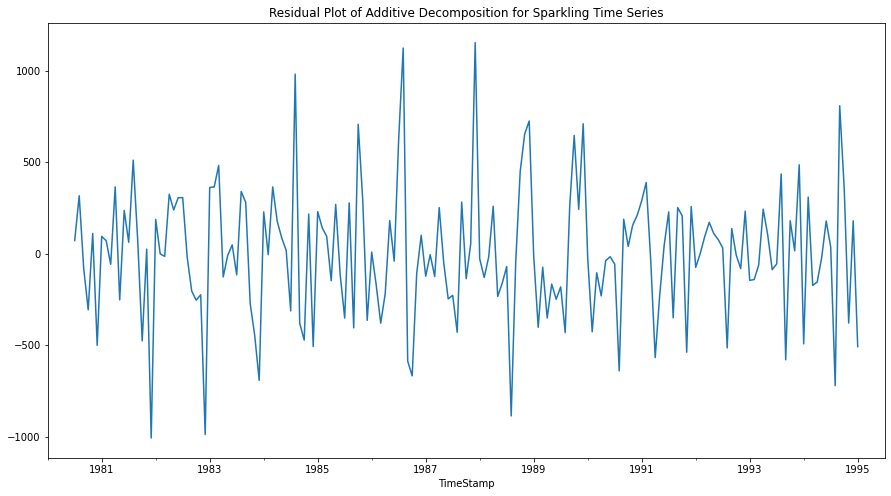

In [174]:
#Let us know view S_Residual plot
S_Residual.plot()
plt.title('Residual Plot of Additive Decomposition for Sparkling Time Series')

#### Multiplicative Decomposition of Sparkling

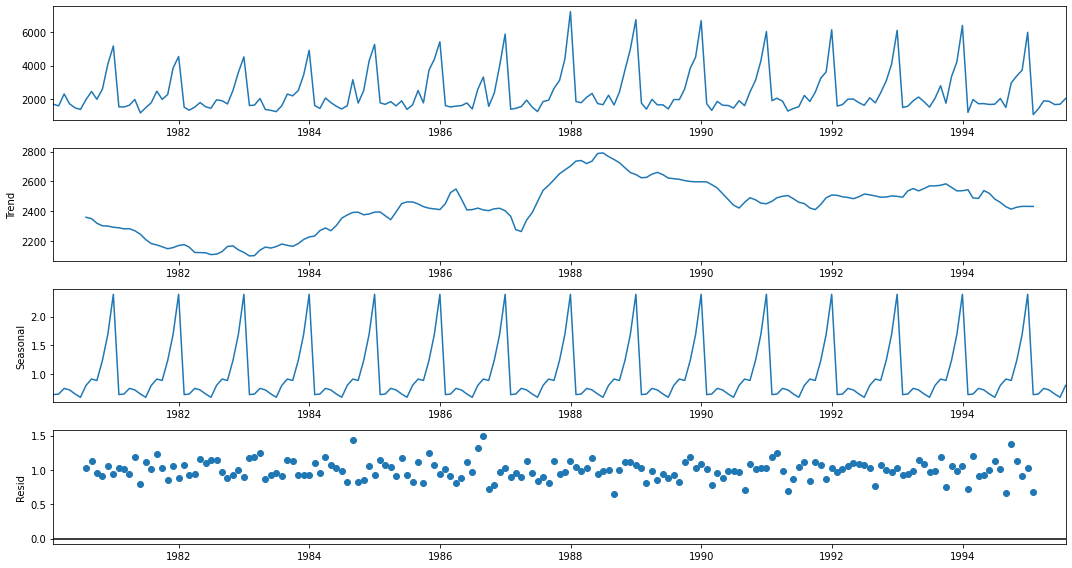

In [175]:
df2_Mdecompose = seasonal_decompose(df2, model='multiplicative', period=12)
df2_Mdecompose.plot()
plt.tight_layout()
plt.show();

In [176]:
SM_Trend=df2_Mdecompose.trend
SM_Seasonality=df2_Mdecompose.seasonal
SM_Residual=df2_Mdecompose.resid

print ('SM_Trend', SM_Trend.head(10), '\n')
print ('SM_Seasonality', SM_Seasonality.head(10), '\n')
print ('SM_Residual', SM_Residual.head(10), '\n')

SM_Trend TimeStamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
Name: trend, dtype: float64 

SM_Seasonality TimeStamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
Name: seasonal, dtype: float64 

SM_Residual TimeStamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
Name: resid, dtype: float64 



In [177]:
SM_Trend.head(12).to_csv('Sparkling_mtrend.csv')
SM_Seasonality.head(12).to_csv('Sparkling_mseason.csv')
SM_Residual.head(12).to_csv('Sparkling_mresid.csv')

Text(0.5, 1.0, 'Residual Plot of Multiplicative Decomposition for Sparkling Time Series')

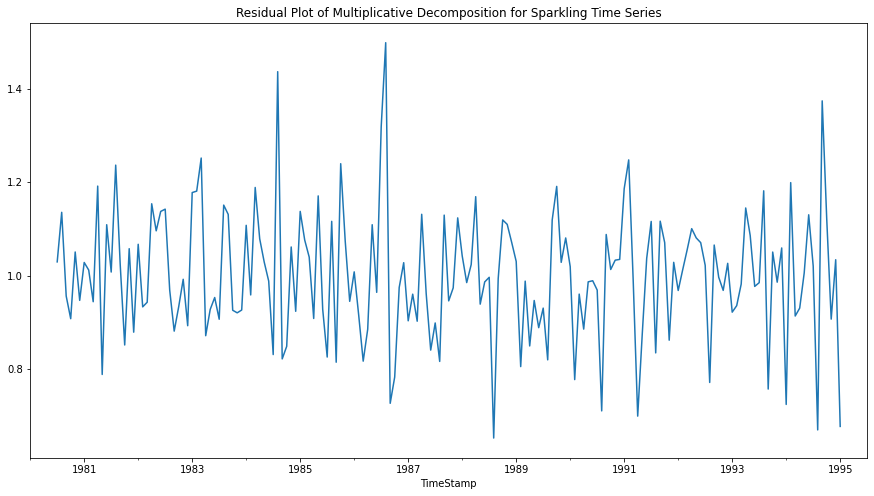

In [178]:
#Let us know view R_Residual plot for Multiplicative Decomposition
SM_Residual.plot()
plt.title('Residual Plot of Multiplicative Decomposition for Sparkling Time Series')

### Split the data into training and test. The test data should start in 1991.

In [179]:
strain=df2[df2.index<'1991']
stest=df2[df2.index>='1991']

In [180]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


In [181]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [182]:
print('First few rows of Training Data')
display(strain.head())
print('Last few rows of Training Data')
display(strain.tail())
print('First few rows of Test Data')
display(stest.head())
print('Last few rows of Test Data')
display(stest.tail())

First few rows of Training Data


Sparkling
TimeStamp            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
TimeStamp            
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
TimeStamp            
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
TimeStamp            
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

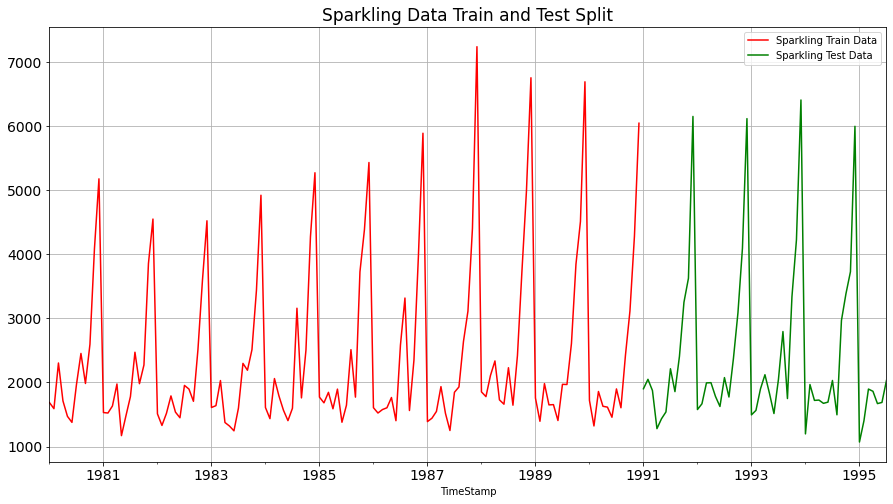

In [183]:
#Visualization of train and test data.
strain['Sparkling'].plot(fontsize=14, color='red')
stest['Sparkling'].plot(fontsize=14, color='green')
plt.grid()
plt.legend(['Sparkling Train Data','Sparkling Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.show();

### Build different Models and Model Evaluation

#### Model 1 - LINEAR REGRESSION

Before we start with Linear Regression we have to modify our training and test data so that we can build a model that is going to regress the 'Rose' variable against the order of the occurrence.

In [184]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


In [185]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [186]:
LR_strain = strain.copy()
LR_stest = stest.copy()

In [187]:
LR_strain['Time']=train_time
LR_stest['Time']=test_time

In [188]:
print('First few rows of Training Data')
display(LR_strain.head())
print('Last few rows of Training Data')
display(LR_strain.tail())
print('First few rows of Test Data')
display(LR_stest.head())
print('Last few rows of Test Data')
display(LR_stest.tail())

First few rows of Training Data


Sparkling  Time
TimeStamp                  
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5

Last few rows of Training Data


Sparkling  Time
TimeStamp                  
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132

First few rows of Test Data


Sparkling  Time
TimeStamp                  
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137

Last few rows of Test Data


Sparkling  Time
TimeStamp                  
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187

In [189]:
#Let us build Linear Regression on the modified test and training data
from sklearn.linear_model import LinearRegression
lrs = LinearRegression()

In [191]:
lrs.fit(LR_strain[['Time']],LR_strain['Sparkling'])

LinearRegression()

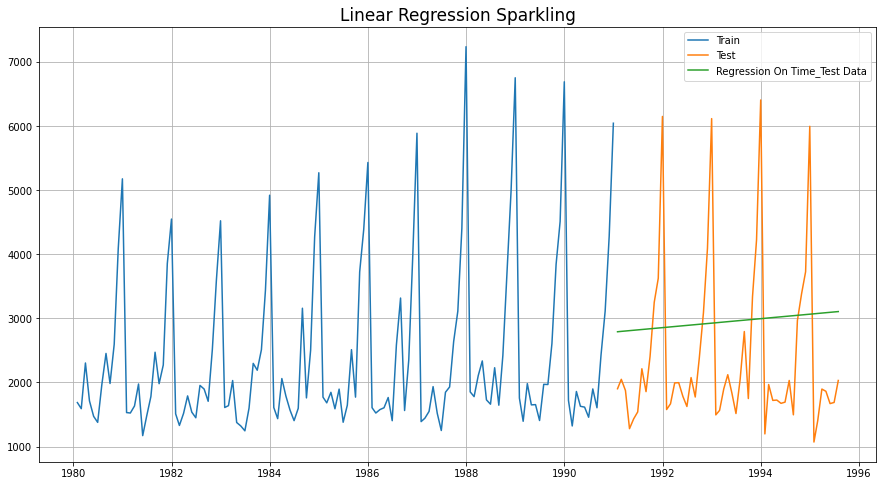

In [192]:
train_predictions_LR = lrs.predict(LR_strain[['Time']])
LR_strain['RegOnTime']= train_predictions_LR

test_predictions_LR = lrs.predict(LR_stest[['Time']])
LR_stest['RegOnTime'] = test_predictions_LR

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LR_stest['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Sparkling', fontsize=17)
plt.legend(loc='best')
plt.grid()
plt.show();

In [193]:
#Model Evaluation
rmse_LRS_test = mean_squared_error(stest['Sparkling'],test_predictions_LR,squared=False)
print("For Regression On Time forecast on the Test Data,  RMSE is %3.3f " %(rmse_LRS_test))

For Regression On Time forecast on the Test Data,  RMSE is 1389.135 


In [194]:
#Let's create a DataFrame for all the RMSE Value
LRs = pd.DataFrame({'Test RMSE Sparkling': [rmse_LRS_test]},index=['Regression On Time'])
LRs

Test RMSE Sparkling
Regression On Time          1389.135175

#### Model 2 - NAIVE APPROACH

In [195]:
NM_strain = strain.copy()
NM_stest = stest.copy()

In [47]:
strain.tail()

Sparkling
TimeStamp            
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [196]:
NM_stest['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]
NM_stest['naive'].head()

TimeStamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

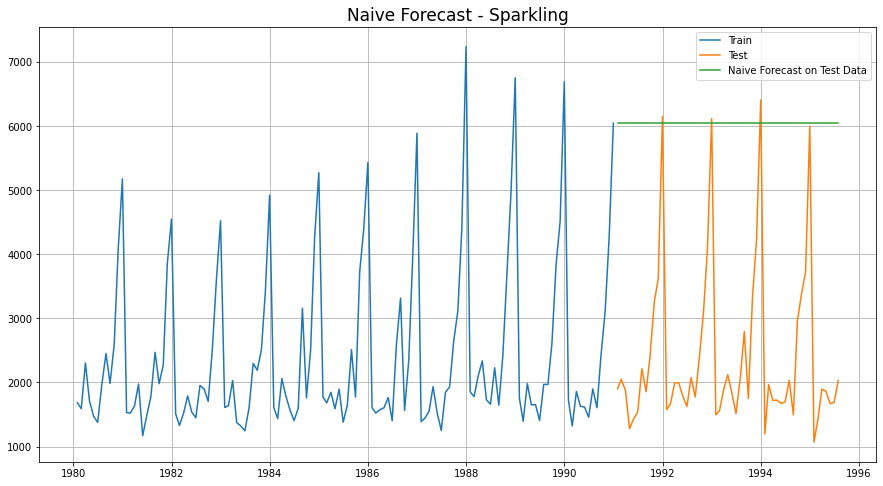

In [197]:
plt.plot(NM_strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(NM_stest['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Sparkling", fontsize=17)
plt.grid()
plt.show();

In [198]:
rmse_NM_stest = mean_squared_error(stest['Sparkling'],NM_stest['naive'],squared=False)
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_NM_stest))

For Naive Model forecast on the Test Data,  RMSE is 3864.279


In [199]:
NMs = pd.DataFrame({'Test RMSE Sparkling': [rmse_NM_stest]},index=['Naive Model'])

In [200]:
RMSE_Sparkling = pd.concat([LRs, NMs], axis=0);
RMSE_Sparkling

Test RMSE Sparkling
Regression On Time          1389.135175
Naive Model                 3864.279352

#### Model 3 - SIMPLE AVERAGE MODEL

In [201]:
#For this particular simple average method, we will forecast by using the average of the training values.
SA_strain = strain.copy()
SA_stest = stest.copy()

In [202]:
SA_stest['mean_forecast'] = strain['Sparkling'].mean()
SA_stest.head()

Sparkling  mean_forecast
TimeStamp                           
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

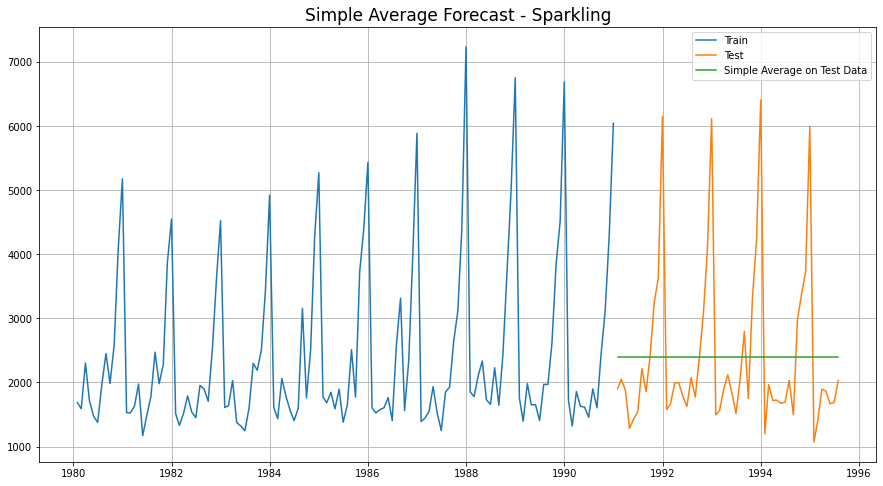

In [203]:
plt.plot(SA_strain['Sparkling'], label='Train')
plt.plot(SA_stest['Sparkling'], label='Test')

plt.plot(SA_stest['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid()
plt.show();

In [204]:
rmse_SA_stest = mean_squared_error(stest['Sparkling'],SA_stest['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_SA_stest))

For Simple Average forecast on Sparkling Test Data,  RMSE is 1275.082


In [205]:
SAs = pd.DataFrame({'Test RMSE Sparkling': [rmse_SA_stest]},index=['Simple Average Model'])

In [206]:
RMSE_Sparkling = pd.concat([LRs, NMs,SAs], axis=0)
RMSE_Sparkling

Test RMSE Sparkling
Regression On Time            1389.135175
Naive Model                   3864.279352
Simple Average Model          1275.081804

#### Model 4 - MOVING AVERAGE MODEL

In [207]:
MovingAverage = df2.copy()
MovingAverage.head()

Sparkling
TimeStamp            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [208]:
#Moving Models
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_4  Trailing_6  Trailing_9
TimeStamp                                                
1980-01-31       1686         NaN         NaN         NaN
1980-02-29       1591         NaN         NaN         NaN
1980-03-31       2304         NaN         NaN         NaN
1980-04-30       1712     1823.25         NaN         NaN
1980-05-31       1471     1769.50         NaN         NaN

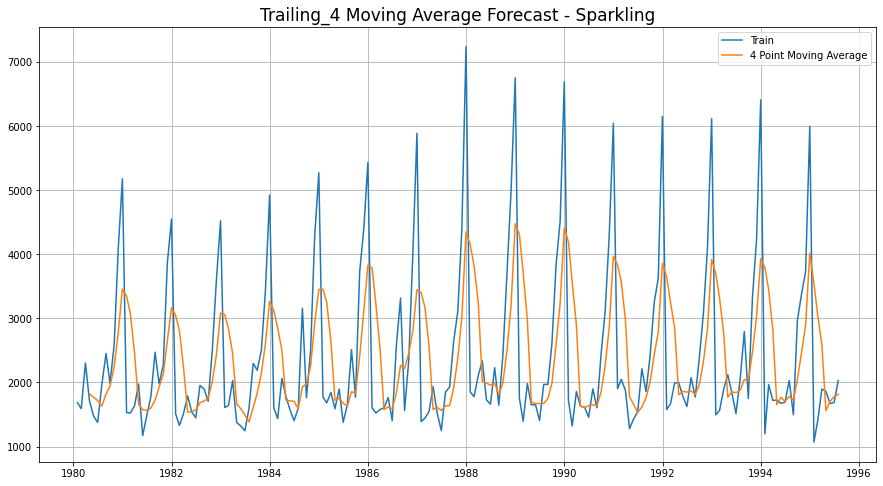

In [213]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')

plt.legend(loc = 'best')
plt.grid()
plt.title('Trailing_4 Moving Average Forecast - Sparkling', fontsize=17)
plt.show();

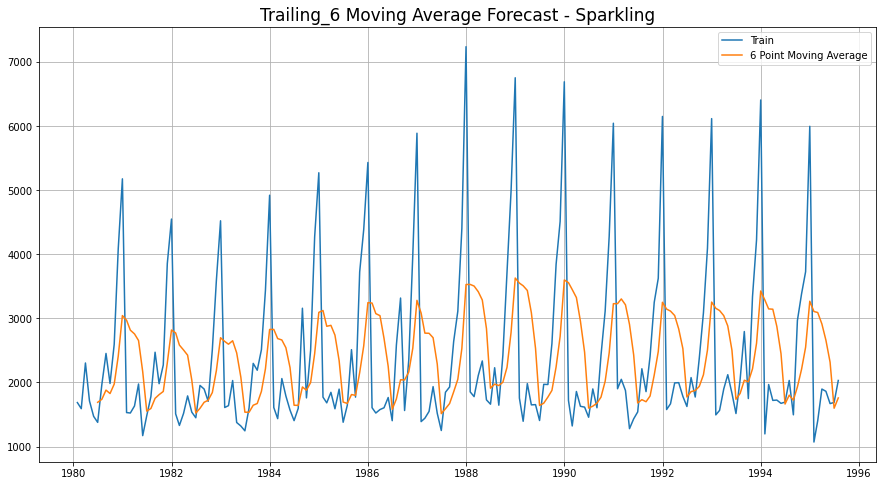

In [212]:
plt.plot(MovingAverage['Sparkling'], label='Train')

plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')

plt.legend(loc = 'best')
plt.grid()
plt.title('Trailing_6 Moving Average Forecast - Sparkling', fontsize=17)
plt.show();

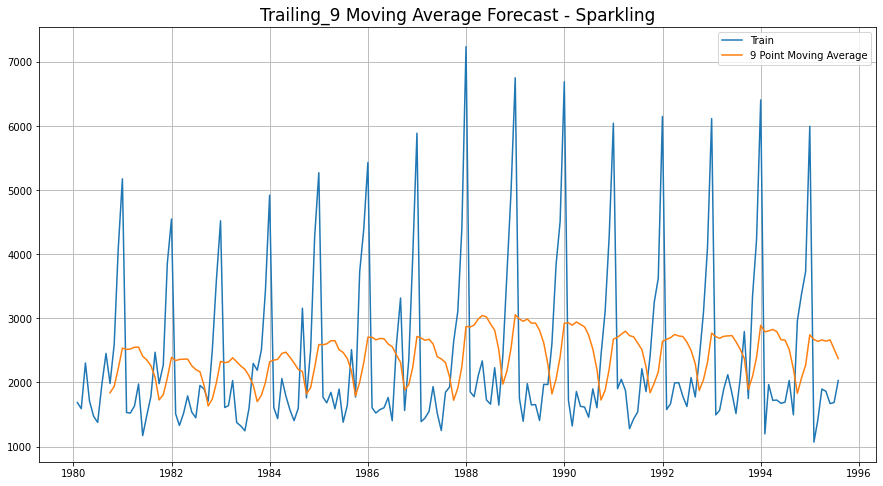

In [211]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid()
plt.title('Trailing_9 Moving Average Forecast - Sparkling', fontsize=17)
plt.show();

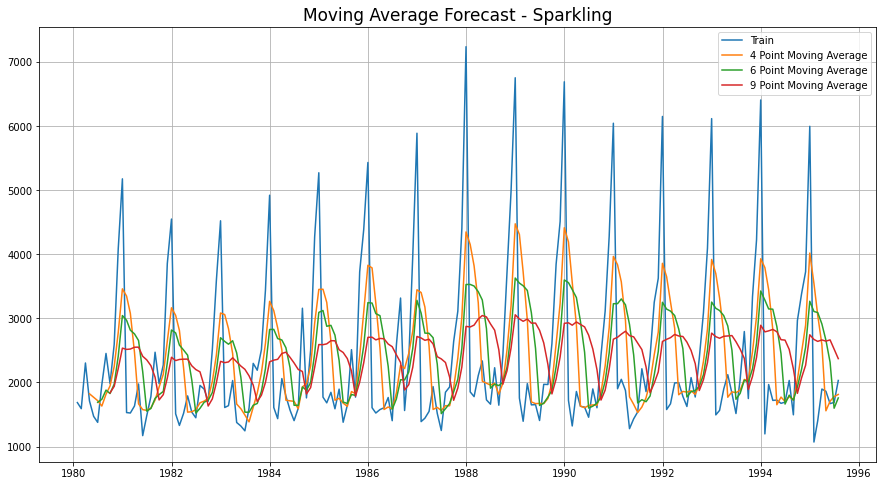

In [71]:
#Visulaizing the trailing models together on whole Rose dataset
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid()
plt.title('Moving Average Forecast - Sparkling', fontsize=17)
plt.show();

In [72]:
#Splitting the data into test anr train again
trailing_MovingAverage_strain=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_stest=MovingAverage[MovingAverage.index>='1991']

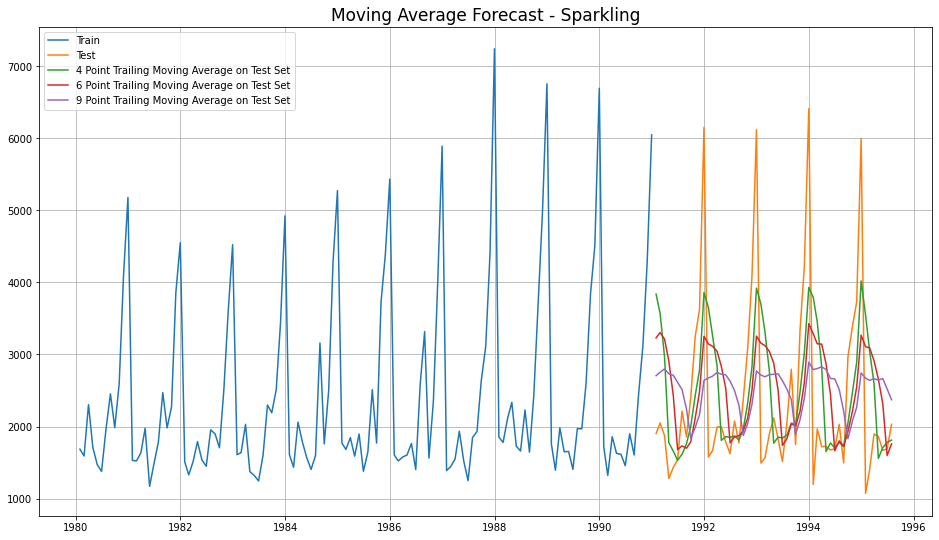

In [74]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_strain['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_stest['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_stest['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_stest['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_stest['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
#The best location for title
plt.legend(loc ='best')
plt.grid()
plt.title('Moving Average Forecast - Sparkling', fontsize=17);
plt.show();

In [75]:
#Model Evaluation: This is done only on test data

## Test Data - RMSE --> 4 point Trailing MA

rmse_MAs_test_4 = mean_squared_error(stest['Sparkling'],trailing_MovingAverage_stest['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_MAs_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_MAs_test_6 = mean_squared_error(stest['Sparkling'],trailing_MovingAverage_stest['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_MAs_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_MAs_test_9 = mean_squared_error(stest['Sparkling'],trailing_MovingAverage_stest['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_MAs_test_9))

For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1346.278


In [78]:
MAs = pd.DataFrame({'Test RMSE Sparkling': [rmse_MAs_test_4 ,rmse_MAs_test_6,rmse_MAs_test_9]} ,index=['4point Trailing MovingAverage','6point Trailing MovingAverage','9point Trailing MovingAverage'])
MAs

Test RMSE Sparkling
4point Trailing MovingAverage          1156.589694
6point Trailing MovingAverage          1283.927428
9point Trailing MovingAverage          1346.278315

In [79]:
RMSE_Sparkling = pd.concat([LRs, NMs,SAs, MAs], axis=0)
RMSE_Sparkling

Test RMSE Sparkling
Regression On Time                     1389.135175
Naive Model                            3864.279352
Simple Average Model                   1275.081804
4point Trailing MovingAverage          1156.589694
6point Trailing MovingAverage          1283.927428
9point Trailing MovingAverage          1346.278315

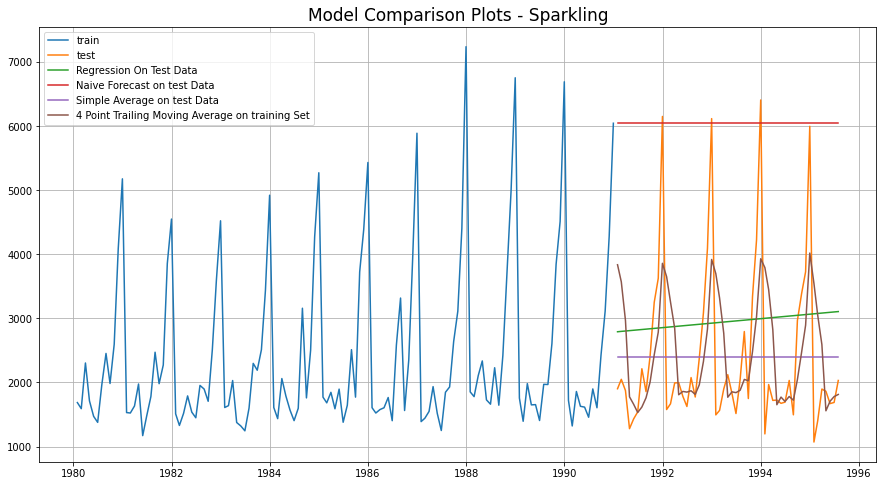

In [80]:
#Since we have built all the models now, lets visualize a consildated plots for all the above models.
plt.plot(strain['Sparkling'], label='train')
plt.plot(stest['Sparkling'], label='test')

plt.plot(LR_stest['RegOnTime'], label='Regression On Test Data')

plt.plot(NM_stest['naive'], label='Naive Forecast on test Data')

plt.plot(SA_stest['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_stest['Trailing_4'], label='4 Point Trailing Moving Average on training Set') #4point Trailing MovingAverage has the least RMSE value


plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=17)
plt.grid();

### Model 5 - Simple Exponential Smoothing

In [81]:
import statsmodels.tools.eval_measures as em
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [82]:
S_SES = SimpleExpSmoothing(strain,initialization_method='estimated' )
S_SES_autofit = S_SES.fit(optimized=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [83]:
S_SES_autofit.params

{'smoothing_level': 0.07028781460389563,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897732,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
#Here, Python has optimized the smoothing level to be almost 0.1
SES_predict_spark = S_SES_autofit.forecast(steps=len(stest))
SES_predict_spark

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-31    2804.662714
1991-02-28    2804.662714
1991-03-31    2804.662714
1991-04-30    2804.662714
1991-05-31    2804.662714
1991-06-30    2804.662714
1991-07-31    2804.662714
1991-08-31    2804.662714
1991-09-30    2804.662714
1991-10-31    2804.662714
1991-11-30    2804.662714
1991-12-31    2804.662714
1992-01-31    2804.662714
1992-02-29    2804.662714
1992-03-31    2804.662714
1992-04-30    2804.662714
1992-05-31    2804.662714
1992-06-30    2804.662714
1992-07-31    2804.662714
1992-08-31    2804.662714
1992-09-30    2804.662714
1992-10-31    2804.662714
1992-11-30    2804.662714
1992-12-31    2804.662714
1993-01-31    2804.662714
1993-02-28    2804.662714
1993-03-31    2804.662714
1993-04-30    2804.662714
1993-05-31    2804.662714
1993-06-30    2804.662714
1993-07-31    2804.662714
1993-08-31    2804.662714
1993-09-30    2804.662714
1993-10-31    2804.662714
1993-11-30    2804.662714
1993-12-31    2804.662714
1994-01-31    2804.662714
1994-02-28    2804.662714
1994-03-31  

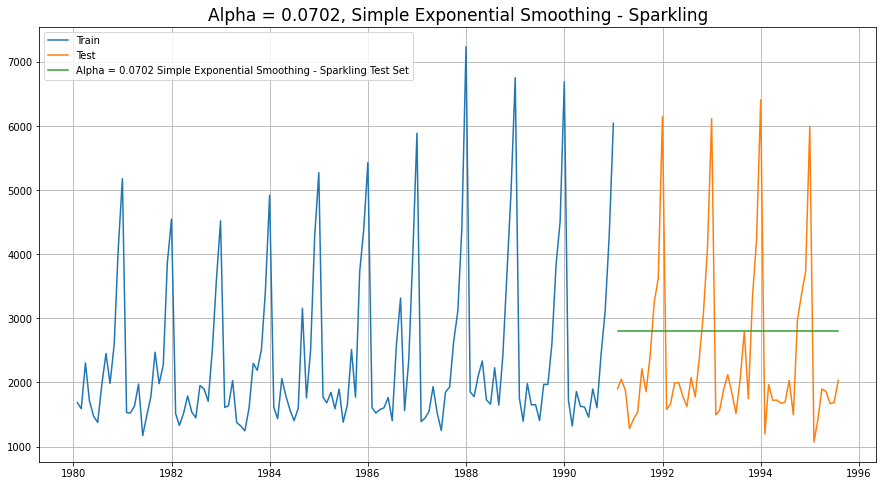

In [85]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha = 0.0702 Simple Exponential Smoothing - Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.0702, Simple Exponential Smoothing - Sparkling', fontsize=17);

In [86]:
#Model Evaluation
print('SES RMSE:',mean_squared_error(stest.values,SES_predict_spark.values,squared=False))

SES RMSE: 1338.0046232563645


In [88]:
S_SES= pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,SES_predict_spark.values,squared=False)]},index=['Simple Exponential Smoothing'])
RMSE_Sparkling = pd.concat([LRs, NMs, MAs, SAs, S_SES], axis=0)
RMSE_Sparkling

Test RMSE Sparkling
Regression On Time                     1389.135175
Naive Model                            3864.279352
4point Trailing MovingAverage          1156.589694
6point Trailing MovingAverage          1283.927428
9point Trailing MovingAverage          1346.278315
Simple Average Model                   1275.081804
Simple Exponential Smoothing           1338.004623

#### Model 6 - Double Exponential Model

In [89]:
S_DES = Holt(strain,initialization_method='estimated' )
S_DES_autofit = S_DES.fit(optimized=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [90]:
S_DES_autofit.params

{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999998,
 'initial_trend': 74.87272727272733,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:
DES_predict_spark = S_DES_autofit.forecast(steps=len(stest))
DES_predict_spark

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-31    5401.733026
1991-02-28    5476.005230
1991-03-31    5550.277433
1991-04-30    5624.549637
1991-05-31    5698.821840
1991-06-30    5773.094044
1991-07-31    5847.366248
1991-08-31    5921.638451
1991-09-30    5995.910655
1991-10-31    6070.182858
1991-11-30    6144.455062
1991-12-31    6218.727266
1992-01-31    6292.999469
1992-02-29    6367.271673
1992-03-31    6441.543876
1992-04-30    6515.816080
1992-05-31    6590.088284
1992-06-30    6664.360487
1992-07-31    6738.632691
1992-08-31    6812.904894
1992-09-30    6887.177098
1992-10-31    6961.449302
1992-11-30    7035.721505
1992-12-31    7109.993709
1993-01-31    7184.265912
1993-02-28    7258.538116
1993-03-31    7332.810320
1993-04-30    7407.082523
1993-05-31    7481.354727
1993-06-30    7555.626930
1993-07-31    7629.899134
1993-08-31    7704.171338
1993-09-30    7778.443541
1993-10-31    7852.715745
1993-11-30    7926.987948
1993-12-31    8001.260152
1994-01-31    8075.532356
1994-02-28    8149.804559
1994-03-31  

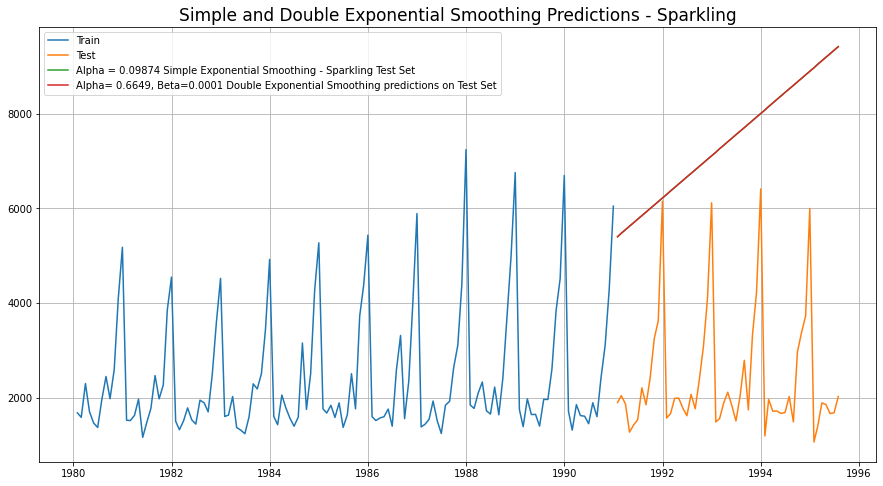

In [92]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(DES_predict_spark, label='Alpha = 0.09874 Simple Exponential Smoothing - Sparkling Test Set') #SES
plt.plot(DES_predict_spark, label='Alpha= 0.6649, Beta=0.0001 Double Exponential Smoothing predictions on Test Set') #DES

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling', fontsize=17);

In [93]:
#Model Evaluation
print('DES RMSE:',mean_squared_error(stest.values,DES_predict_spark.values,squared=False))

DES RMSE: 5291.879833226911


In [94]:
S_DES= pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,DES_predict_spark.values,squared=False)]},index=['Double Exponential Smoothing'])
RMSE_Sparkling = pd.concat([LRs, NMs, MAs, SAs, S_SES, S_DES], axis=0)
RMSE_Sparkling

Test RMSE Sparkling
Regression On Time                     1389.135175
Naive Model                            3864.279352
4point Trailing MovingAverage          1156.589694
6point Trailing MovingAverage          1283.927428
9point Trailing MovingAverage          1346.278315
Simple Average Model                   1275.081804
Simple Exponential Smoothing           1338.004623
Double Exponential Smoothing           5291.879833

#### Model 7 - Holt-Winter's Model (Exponential Smoothing) with additive errors

In [95]:
S_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated')
S_TES_autofit = S_TES.fit(optimized=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [96]:
S_TES_autofit.params

{'smoothing_level': 0.11127217859992398,
 'smoothing_trend': 0.01236078328796452,
 'smoothing_seasonal': 0.4607177642170641,
 'damping_trend': nan,
 'initial_level': 2356.578308185137,
 'initial_trend': -0.01853556812789492,
 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
        -808.42525514, -815.35024951, -384.23066987,   72.99508063,
        -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [97]:
TES_predict_spark = S_TES_autofit.forecast(steps=len(stest))
TES_predict_spark

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-31    1490.574426
1991-02-28    1204.714325
1991-03-31    1688.941106
1991-04-30    1551.450810
1991-05-31    1461.440427
1991-06-30    1278.907163
1991-07-31    1805.164022
1991-08-31    1679.251392
1991-09-30    2315.687649
1991-10-31    3225.308906
1991-11-30    4299.652360
1991-12-31    6411.161332
1992-01-31    1483.296578
1992-02-29    1197.436477
1992-03-31    1681.663258
1992-04-30    1544.172962
1992-05-31    1454.162580
1992-06-30    1271.629315
1992-07-31    1797.886174
1992-08-31    1671.973544
1992-09-30    2308.409801
1992-10-31    3218.031058
1992-11-30    4292.374513
1992-12-31    6403.883484
1993-01-31    1476.018731
1993-02-28    1190.158629
1993-03-31    1674.385411
1993-04-30    1536.895114
1993-05-31    1446.884732
1993-06-30    1264.351467
1993-07-31    1790.608327
1993-08-31    1664.695696
1993-09-30    2301.131954
1993-10-31    3210.753211
1993-11-30    4285.096665
1993-12-31    6396.605637
1994-01-31    1468.740883
1994-02-28    1182.880782
1994-03-31  

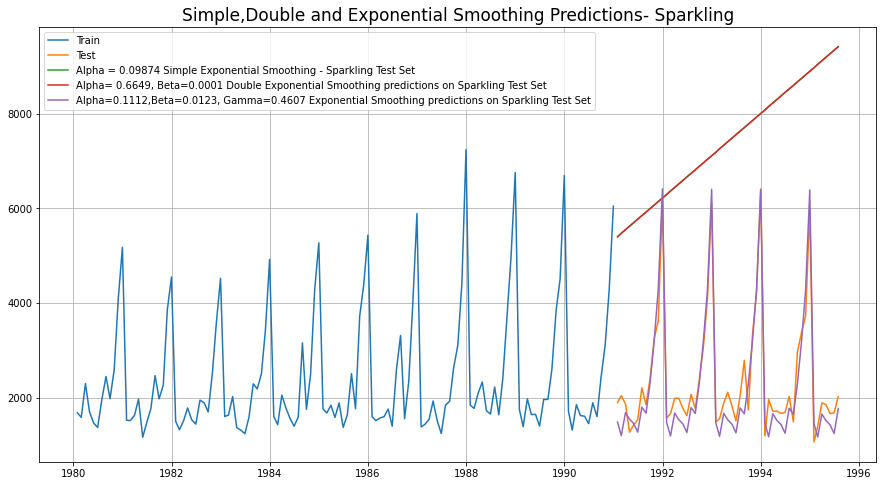

In [98]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(DES_predict_spark, label='Alpha = 0.09874 Simple Exponential Smoothing - Sparkling Test Set') #SES
plt.plot(DES_predict_spark, label='Alpha= 0.6649, Beta=0.0001 Double Exponential Smoothing predictions on Sparkling Test Set') #DES
plt.plot(TES_predict_spark, label='Alpha=0.1112,Beta=0.0123, Gamma=0.4607 Exponential Smoothing predictions on Sparkling Test Set') #TES

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Exponential Smoothing Predictions- Sparkling', fontsize=17);

In [99]:
#Model Evaluation
print('TES RMSE:',mean_squared_error(stest.values,TES_predict_spark.values,squared=False))

TES RMSE: 378.6262408893861


In [100]:
S_TES= pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_spark.values,squared=False)]},index=['Exponential Smoothing (Additive Seasonality)'])
RMSE_Sparkling = pd.concat([LRs, NMs, MAs, SAs, S_SES, S_DES, S_TES], axis=0)
RMSE_Sparkling

Test RMSE Sparkling
Regression On Time                                    1389.135175
Naive Model                                           3864.279352
4point Trailing MovingAverage                         1156.589694
6point Trailing MovingAverage                         1283.927428
9point Trailing MovingAverage                         1346.278315
Simple Average Model                                  1275.081804
Simple Exponential Smoothing                          1338.004623
Double Exponential Smoothing                          5291.879833
Exponential Smoothing (Additive Seasonality)           378.626241

#### Model 8 - Holt-Winter's Model (Exponential Smoothing) with multiplicative seasonality

In [101]:
S_TES_M = ExponentialSmoothing(strain,trend='additive',seasonal='multiplicative',initialization_method='estimated')
S_TES_M_autofit = S_TES_M.fit(optimized=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [102]:
S_TES_M_autofit.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [103]:
TES_M_predict_spark = S_TES_M_autofit.forecast(steps=len(stest))
TES_M_predict_spark

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-31    1587.685845
1991-02-28    1356.590237
1991-03-31    1763.121866
1991-04-30    1656.379813
1991-05-31    1542.186697
1991-06-30    1355.276292
1991-07-31    1854.460265
1991-08-31    1820.822870
1991-09-30    2277.203230
1991-10-31    3122.460625
1991-11-30    4129.148636
1991-12-31    5891.184787
1992-01-31    1538.578232
1992-02-29    1314.522051
1992-03-31    1708.305381
1992-04-30    1604.748228
1992-05-31    1493.989468
1992-06-30    1312.809887
1992-07-31    1796.200235
1992-08-31    1763.469447
1992-09-30    2205.285676
1992-10-31    3023.588340
1992-11-30    3998.053790
1992-12-31    5703.651532
1993-01-31    1489.470618
1993-02-28    1272.453864
1993-03-31    1653.488895
1993-04-30    1553.116644
1993-05-31    1445.792238
1993-06-30    1270.343481
1993-07-31    1737.940206
1993-08-31    1706.116024
1993-09-30    2133.368122
1993-10-31    2924.716056
1993-11-30    3866.958944
1993-12-31    5516.118277
1994-01-31    1440.363005
1994-02-28    1230.385677
1994-03-31  

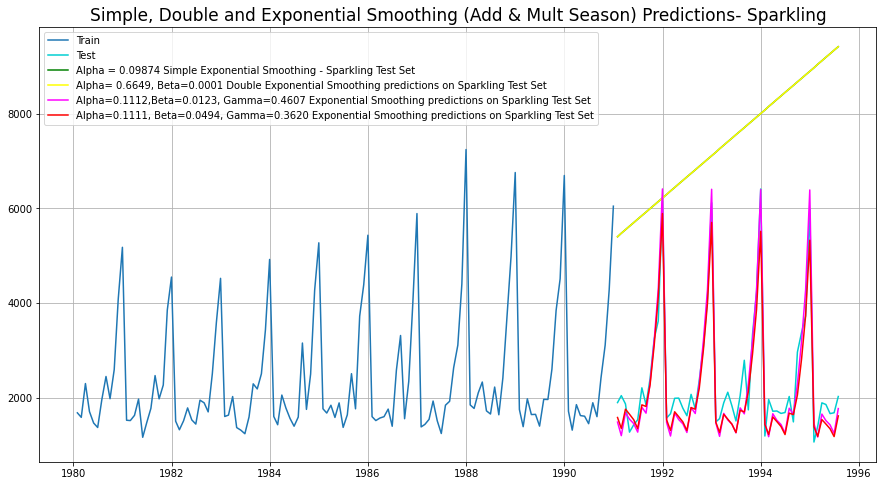

In [106]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test', color = 'darkturquoise')

plt.plot(DES_predict_spark, label='Alpha = 0.09874 Simple Exponential Smoothing - Sparkling Test Set', color = 'green') #SES
plt.plot(DES_predict_spark, label='Alpha= 0.6649, Beta=0.0001 Double Exponential Smoothing predictions on Sparkling Test Set',color = 'yellow') #DES
plt.plot(TES_predict_spark, label='Alpha=0.1112,Beta=0.0123, Gamma=0.4607 Exponential Smoothing predictions on Sparkling Test Set', color = 'magenta') #TES
plt.plot(TES_M_predict_spark, label='Alpha=0.1111, Beta=0.0494, Gamma=0.3620 Exponential Smoothing predictions on Sparkling Test Set', color = 'red')

plt.legend(loc='best')
plt.grid()
plt.title('Simple, Double and Exponential Smoothing (Add & Mult Season) Predictions- Sparkling', fontsize=17);

In [107]:
#Model Evaluation
print('TES M_RMSE:',mean_squared_error(stest.values,TES_M_predict_spark.values,squared=False))

TES M_RMSE: 403.7062277856435


In [108]:
S_M_TES= pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_M_predict_spark.values,squared=False)]},index=['Exponential Smoothing (Multi Seasonality)'])
RMSE_Sparkling = pd.concat([LRs, NMs, MAs, SAs, S_SES, S_DES, S_TES, S_M_TES], axis=0)
RMSE_Sparkling

Test RMSE Sparkling
Regression On Time                                    1389.135175
Naive Model                                           3864.279352
4point Trailing MovingAverage                         1156.589694
6point Trailing MovingAverage                         1283.927428
9point Trailing MovingAverage                         1346.278315
Simple Average Model                                  1275.081804
Simple Exponential Smoothing                          1338.004623
Double Exponential Smoothing                          5291.879833
Exponential Smoothing (Additive Seasonality)           378.626241
Exponential Smoothing (Multi Seasonality)              403.706228

### Check for stationarity of the whole Time Series data.
The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

1.   H0: The Time Series has a unit root and is thus non-stationary.
2.   H1:The Time Series does not have a unit root and is thus stationary

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α (0.05)
 value.

In [109]:
from statsmodels.tsa.stattools import adfuller

In [110]:
dftest1 = adfuller(df2, regression='ct')
print('DF test statistic is %3.3f' %dftest1[0])
print('DF test p-value is' ,dftest1[1])
print('Number of lags used' ,dftest1[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932584
Number of lags used 12


In [111]:
#Since the p value is greater than 0.05, So Time Series is non-stationary.

#Let us take one level of differencing to see whether the series becomes stationary

dftest1 = adfuller(df2.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest1[0])
print('DF test p-value is' ,dftest1[1])
print('Number of lags used' ,dftest1[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10



1.   We see that p-value < alpha=0.05 Hence, the data is non-stationary
2.   The Sparkling data is now Stationary. Let us go ahead and plot the stationary series.



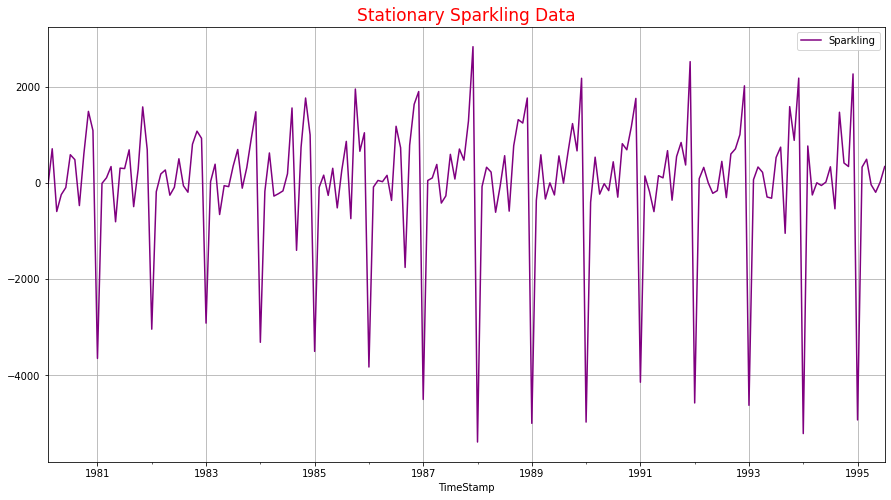

In [113]:
df2.diff().dropna().plot(grid=True, color='purple');
plt.title('Stationary Sparkling Data', color='red', fontsize=17);

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data

In [114]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

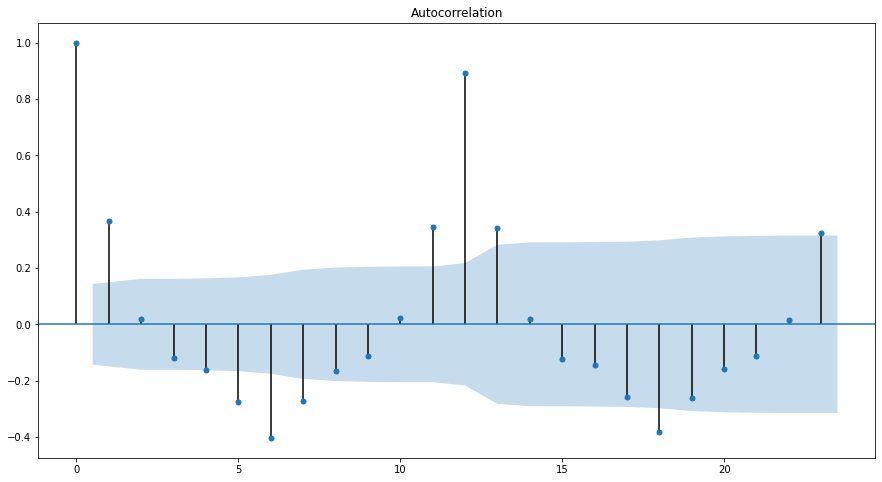

In [115]:
plot_acf(df2, alpha=0.05);

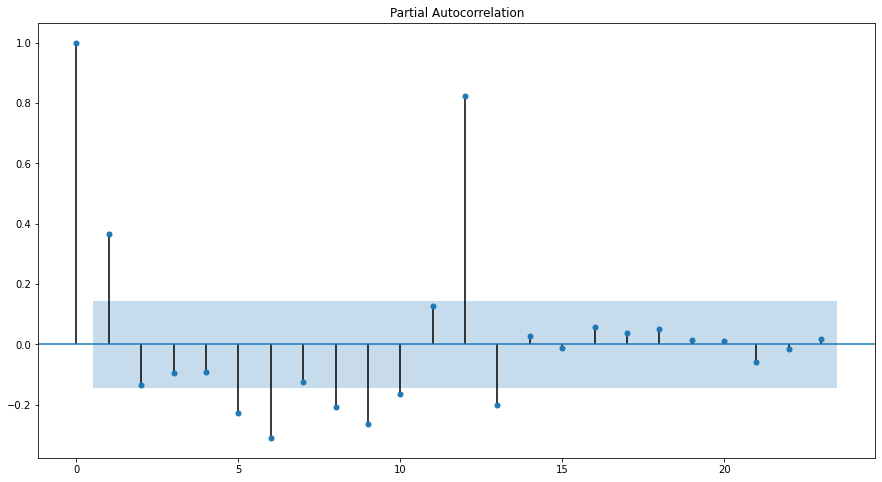

In [116]:
plot_pacf(df2, alpha=0.05, method='ywmle');

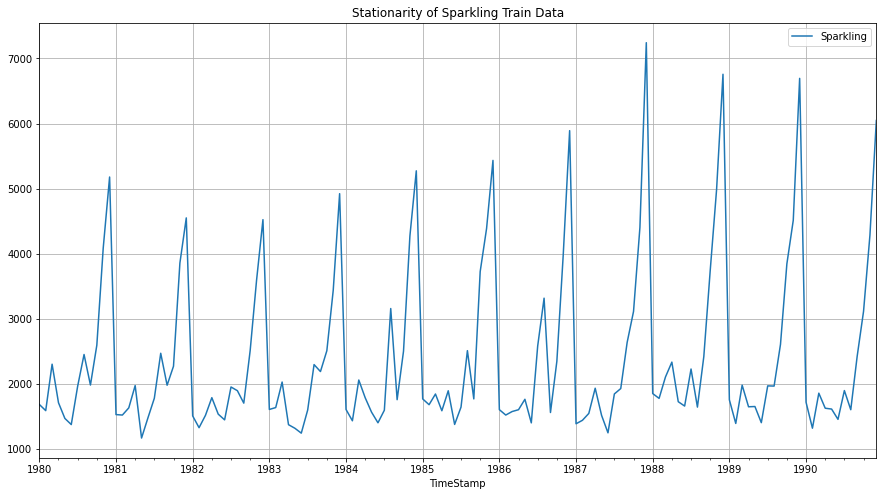

In [117]:
#Checking for stationarity of the Training Data Time Series
strain.plot(grid=True)
plt.title('Stationarity of Sparkling Train Data')
plt.show();

In [118]:
dftest2 = adfuller(strain,regression='ct')
print('DF test statistic is %3.3f' %dftest2[0])
print('DF test p-value is' ,dftest2[1])
print('Number of lags used' ,dftest2[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593698
Number of lags used 12


In [119]:
#Since the train data is non-stationary, lets take first level of differencing
dftest2 = adfuller(strain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest2[0])
print('DF test p-value is' ,dftest2[1])
print('Number of lags used' ,dftest2[2])

DF test statistic is -7.968
DF test p-value is 8.479210655513744e-11
Number of lags used 11


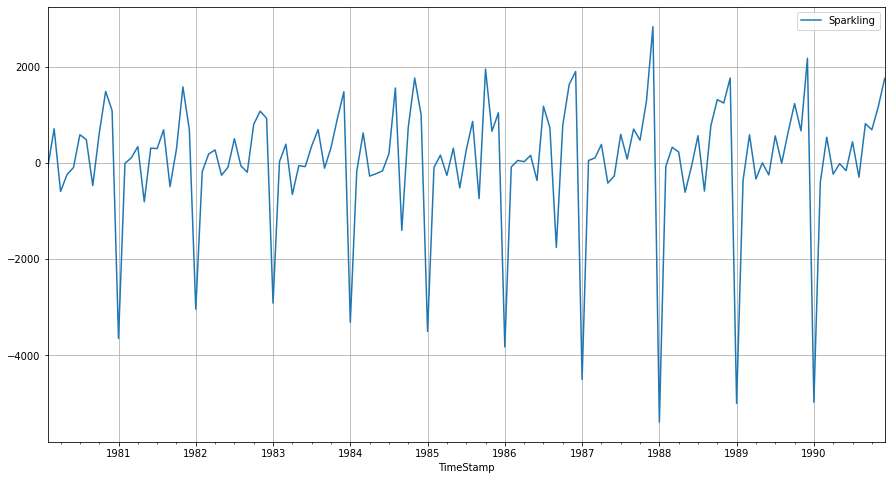

In [120]:
#The data is now stationary at 95% confidence.
strain.diff().dropna().plot(grid=True);

In [121]:
strain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


### Model 9 - Automated ARIMA Model

Now that our training data is stationary, let us build an automated version of ARIMA model and for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

Note: The data has some seasonality so ideally we should build a SARIMA model. But lets test on the lowest Akaike Information Criteria, which one suits best - ARIMA or SARIMA

In [122]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [123]:
# Creating an empty Dataframe with column names only
SPARK_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
SPARK_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [124]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    S_ARIMA_model = ARIMA(strain['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,S_ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    SPARK_ARIMA_AIC = SPARK_ARIMA_AIC.append({'param':param, 'AIC': S_ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155919765
ARIMA(0, 1, 2) - AIC:2234.4083231186187
ARIMA(0, 1, 3) - AIC:2233.9948577487
ARIMA(1, 1, 0) - AIC:2266.6085393190097


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1) - AIC:2235.755094674255
ARIMA(1, 1, 2) - AIC:2234.5272004523868
ARIMA(1, 1, 3) - AIC:2235.60781228637
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.7776263207556
ARIMA(2, 1, 2) - AIC:2213.5092124508856


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.837053031844
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498978682901


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.846784492527
ARIMA(3, 1, 3) - AIC:2221.460835851629


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [125]:
SPARK_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.460836
14  (3, 1, 2)  2230.846784
11  (2, 1, 3)  2232.837053
9   (2, 1, 1)  2233.777626

In [126]:
auto_S_ARIMA = ARIMA(strain, order=(2,1,2))

results_auto_S_ARIMA = auto_S_ARIMA.fit()

print(results_auto_S_ARIMA.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 19 Feb 2023   AIC                           2213.509
Time:                        08:02:00   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.783      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

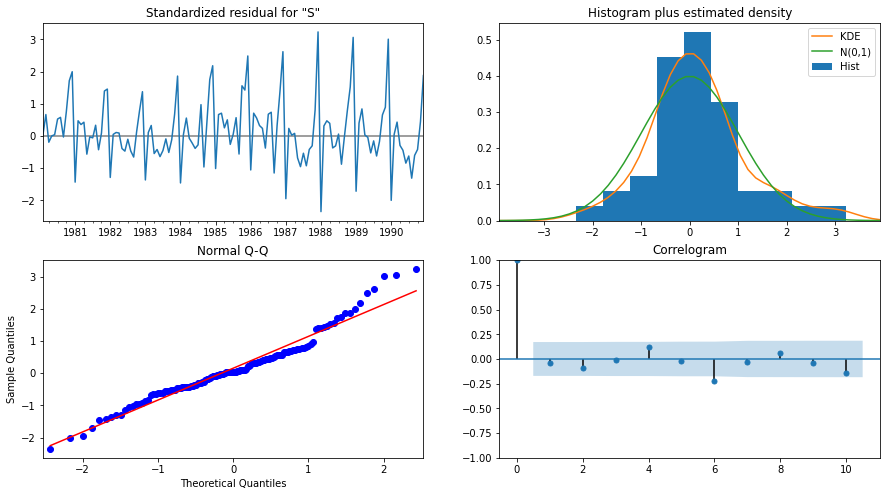

In [128]:
#Sparkling ARIMA Diagnostic plot
results_auto_S_ARIMA.plot_diagnostics();

In [130]:
#Prediction and Evaluation of ARIMA model on the Saprkling Test
predicted_auto_S_ARIMA = results_auto_S_ARIMA.forecast(steps=len(stest))
predicted_auto_S_ARIMA

1991-01-31    4252.358355
1991-02-28    2863.112759
1991-03-31    2043.997386
1991-04-30    1746.222178
1991-05-31    1813.634027
1991-06-30    2068.630217
1991-07-31    2365.511291
1991-08-31    2612.435176
1991-09-30    2770.383514
1991-10-31    2839.526552
1991-11-30    2841.910440
1991-12-31    2806.367031
1992-01-31    2758.396716
1992-02-29    2715.333419
1992-03-31    2685.658996
1992-04-30    2670.807837
1992-05-31    2667.918169
1992-06-30    2672.432770
1992-07-31    2679.972620
1992-08-31    2687.340772
1992-09-30    2692.791631
1992-10-31    2695.822814
1992-11-30    2696.751434
1992-12-31    2696.274565
1993-01-31    2695.129487
1993-02-28    2693.893723
1993-03-31    2692.912695
1993-04-30    2692.316632
1993-05-31    2692.083212
1993-06-30    2692.110313
1993-07-31    2692.276424
1993-08-31    2692.479223
1993-09-30    2692.652413
1993-10-31    2692.766234
1993-11-30    2692.818716
1993-12-31    2692.823918
1994-01-31    2692.801392
1994-02-28    2692.768925
1994-03-31  

In [131]:
#Model Evaluation
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_S_ARIMA,squared=False)
rmse

1299.9806602553501

In [132]:
R_S_ARIMA= pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,predicted_auto_S_ARIMA.values,squared=False)]},index=['ARIMA (2, 1, 2)'])
RMSE_Sparkling = pd.concat([LRs, NMs, MAs, SAs, S_SES, S_DES, S_TES, S_M_TES, R_S_ARIMA], axis=0)
RMSE_Sparkling

Test RMSE Sparkling
Regression On Time                                    1389.135175
Naive Model                                           3864.279352
4point Trailing MovingAverage                         1156.589694
6point Trailing MovingAverage                         1283.927428
9point Trailing MovingAverage                         1346.278315
Simple Average Model                                  1275.081804
Simple Exponential Smoothing                          1338.004623
Double Exponential Smoothing                          5291.879833
Exponential Smoothing (Additive Seasonality)           378.626241
Exponential Smoothing (Multi Seasonality)              403.706228
ARIMA (2, 1, 2)                                       1299.980660

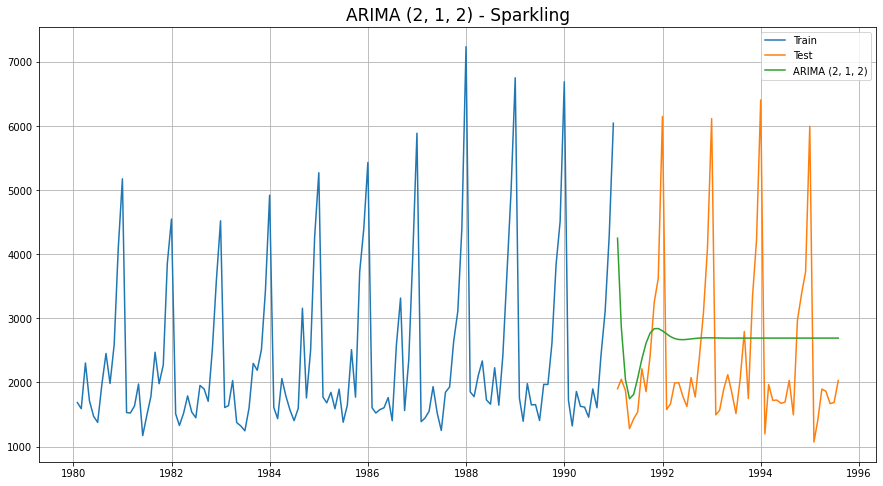

In [133]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_auto_S_ARIMA,label='ARIMA (2, 1, 2)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 2) - Sparkling', fontsize=17);

#### Model 10 - Manual ARIMA

Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

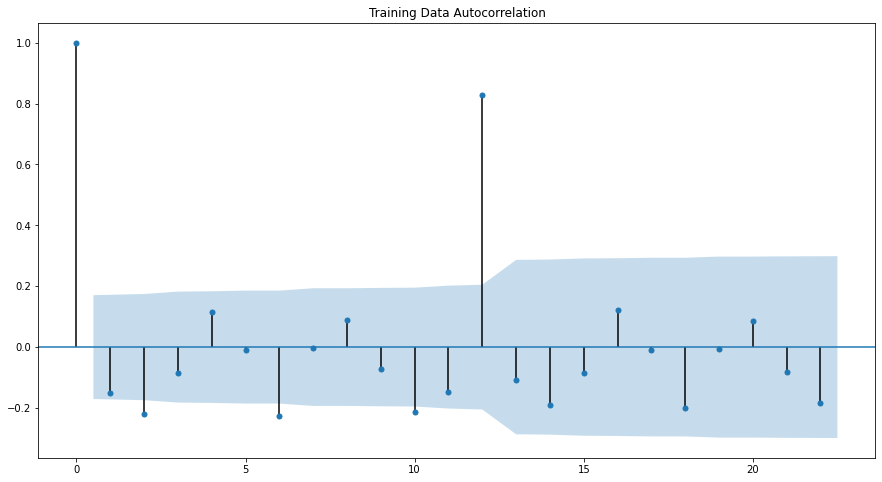

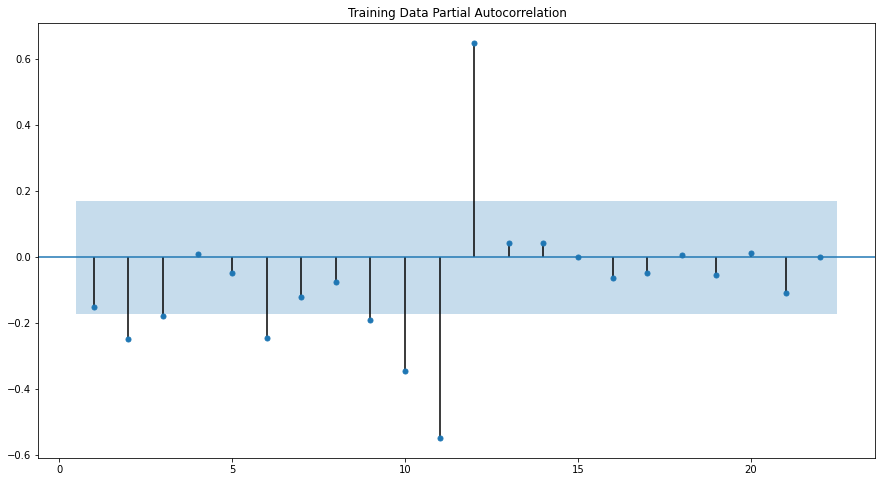

In [134]:
plot_acf(strain.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

As per the above plot p and q will be 0

In [135]:
SManual_ARIMA = ARIMA(strain['Sparkling'], order=(0,1,0),freq='M')

results_SManual_ARIMA = SManual_ARIMA.fit()

print(results_SManual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 19 Feb 2023   AIC                           2267.663
Time:                        08:09:02   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


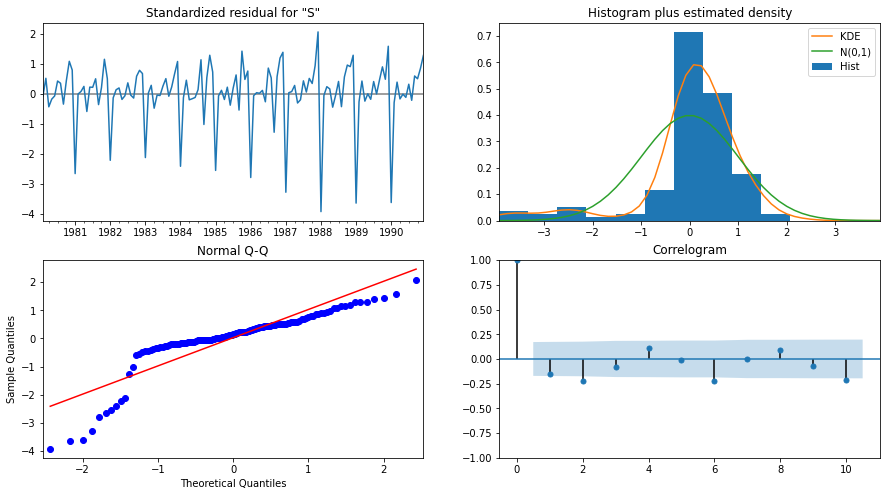

In [137]:
#Sparkling Manual ARIMA Diagnostic plot
results_SManual_ARIMA.plot_diagnostics();

In [138]:
#Prediction and Evaluation of Manual ARIMA model on the Sparkling Test
predicted_SManual_ARIMA = results_SManual_ARIMA.forecast(steps=len(stest))
predicted_SManual_ARIMA

1991-01-31    6047.0
1991-02-28    6047.0
1991-03-31    6047.0
1991-04-30    6047.0
1991-05-31    6047.0
1991-06-30    6047.0
1991-07-31    6047.0
1991-08-31    6047.0
1991-09-30    6047.0
1991-10-31    6047.0
1991-11-30    6047.0
1991-12-31    6047.0
1992-01-31    6047.0
1992-02-29    6047.0
1992-03-31    6047.0
1992-04-30    6047.0
1992-05-31    6047.0
1992-06-30    6047.0
1992-07-31    6047.0
1992-08-31    6047.0
1992-09-30    6047.0
1992-10-31    6047.0
1992-11-30    6047.0
1992-12-31    6047.0
1993-01-31    6047.0
1993-02-28    6047.0
1993-03-31    6047.0
1993-04-30    6047.0
1993-05-31    6047.0
1993-06-30    6047.0
1993-07-31    6047.0
1993-08-31    6047.0
1993-09-30    6047.0
1993-10-31    6047.0
1993-11-30    6047.0
1993-12-31    6047.0
1994-01-31    6047.0
1994-02-28    6047.0
1994-03-31    6047.0
1994-04-30    6047.0
1994-05-31    6047.0
1994-06-30    6047.0
1994-07-31    6047.0
1994-08-31    6047.0
1994-09-30    6047.0
1994-10-31    6047.0
1994-11-30    6047.0
1994-12-31   

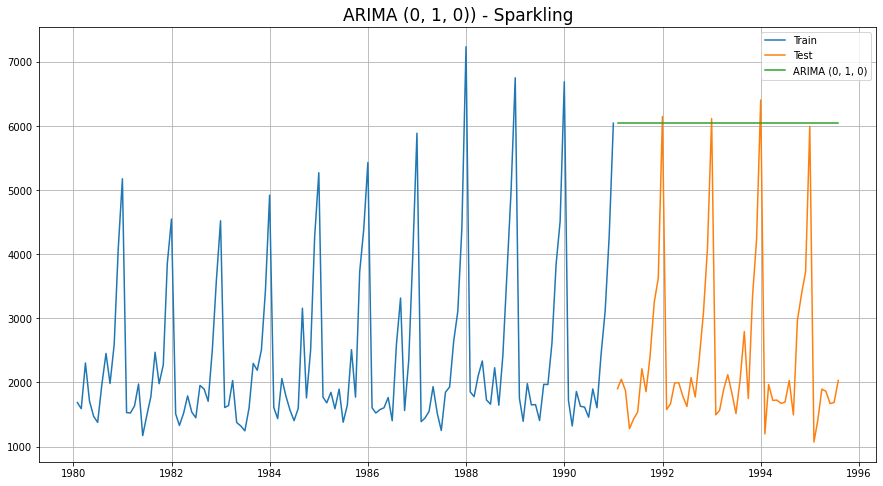

In [139]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_SManual_ARIMA,label='ARIMA (0, 1, 0)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (0, 1, 0)) - Sparkling', fontsize=17);

In [140]:
#Model Evaluation
rmse = mean_squared_error(stest['Sparkling'],predicted_SManual_ARIMA,squared=False)
rmse

3864.2793518443914

In [142]:
SM_ARIMA= pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,predicted_SManual_ARIMA.values,squared=False)]},index=['ARIMA (0, 1, 0)'])
RMSE_Sparkling = pd.concat([LRs, NMs, MAs, SAs, S_SES, S_DES, S_TES, S_M_TES, R_S_ARIMA, SM_ARIMA], axis=0)
RMSE_Sparkling

Test RMSE Sparkling
Regression On Time                                    1389.135175
Naive Model                                           3864.279352
4point Trailing MovingAverage                         1156.589694
6point Trailing MovingAverage                         1283.927428
9point Trailing MovingAverage                         1346.278315
Simple Average Model                                  1275.081804
Simple Exponential Smoothing                          1338.004623
Double Exponential Smoothing                          5291.879833
Exponential Smoothing (Additive Seasonality)           378.626241
Exponential Smoothing (Multi Seasonality)              403.706228
ARIMA (2, 1, 2)                                       1299.980660
ARIMA (0, 1, 0)                                       3864.279352

#### Model 11 - Automated SARIMA Model
Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

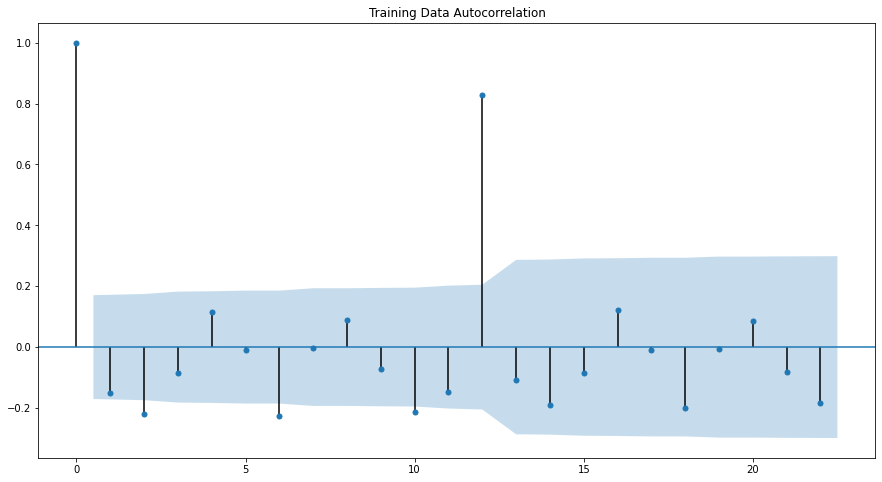

In [143]:
plot_acf(strain.diff(),title='Training Data Autocorrelation',missing='drop');

In [144]:
#We can see that there is a seasonality. Lets build the models now.
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [145]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [146]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_smodel = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                            order=param, seasonal_order= param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_S_SARIMA = SARIMA_smodel.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_S_SARIMA.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_S_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846088
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640239793


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4738.960636378017
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388806
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735792028


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:6892.332946523071
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158609594
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920774


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:2891.20234242652
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625422
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530065428
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3593.1077526390836
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566503
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573596925


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3701.333652675308
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183827
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193755366
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144546253


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3132.378531148751
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195417545
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245094167754
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.401883400661


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3172.550285746605
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679618882
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727996612838
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5889260078807


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3188.299744378058
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.441010168743
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007199924
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890640282


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4308.145125385352
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332307186
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675077765549
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068211877


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:176.45218356183722
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.965477440636
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.543535162661
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215688255804


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3793.1877067854766
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993411462505
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448379874231
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883833558347


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3808.021589062058
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.0925408436715
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770691737442
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973661804042


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3035.869631317732
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0301073197322
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404078382416
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7418977701004
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:6944.110005818481
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.5715807763206
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674810175713
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.0488940281064


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2481.4683409984327
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529488665099
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435178885024
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.1544790214268


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:2506.002764537358
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339903914
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476354874


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3919.0478028354546
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279330658
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592674185
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402585533
SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:7181.599818090381
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080128674
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356131938774
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067517127


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3402.008845257937
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.513464038609
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780415456
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660392970733


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3425.3695372408697
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.9340491545618
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974128205
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352608774
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3752.1486972466005
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.142446652882
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.716746761899
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863611323
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:7101.463164631576
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.616160687459
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3142242359102
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069969448634


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3250.6652789037444
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112074766297
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502479172093
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1416.7958955458653


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3243.6370661929504
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450504507
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.770830749857
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421456779


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4558.526669461682
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.825981259123
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9871793070417
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842467750394
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:7029.675245160204
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216934599967
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5152894201644
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9345631250646


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:4043.3892018744127
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102398007113
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9146975967085
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9666981061978


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:4052.3051965902328
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.026403977316
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.9381449965952
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5176698139828


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3553.693802956693
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.39215958785
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554899501748
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5053481361244
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:6946.017076825495
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4151895204197
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668970004799
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.129268870133


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3047.8956030517925
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723331582522
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509733792651
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.764921361041


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3104.1588753307933
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435406728
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039819779
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4114.489364938403
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066057523
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357349197126
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204446528


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:7122.612432903071
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464863646
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344990881607
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.919175925627
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3588.0588936904724
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728030297
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017619615152
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975663804394


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3111.816338817916
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.8586131458073
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495921576
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080325875
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:4072.8458610562075
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823429297607
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911247307868
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888279507393


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:1159.5347210598652
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060896308
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.159585548082
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428663802108


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3394.3651640210874
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673334862373
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.122134114901
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.824134905593


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3558.9890083696946
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681147571683
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372621196666
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523436425651


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3894.78070104917
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140933253936
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086051247614
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.340403041028
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:7031.39824283168
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1625.2275284634818
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476002822338
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.689322151828


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3320.677189253395
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376146308898
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5040294270732
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4358999000094
SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3312.562727296209
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395884583127
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.0573765222566
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7072772973884


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3989.149896485032
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1757.8361470354491
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1707.4033101625805
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1543.9173471268366
SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:6947.134854490872
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6922615789952
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1569.6188602529787
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1542.5161921107615
SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3480.057014096188
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.789867065877
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1406.5740193820398
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1408.787095374597
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3488.880909469004
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291419262
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923153737


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:4155.548003933235
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.796110470312
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.37838339461
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471974600719
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:7177.147204323252
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025576573
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812582684
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.6808190921906


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3759.779566711426
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.8678620677572
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.677471359765
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.307465735324


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3383.438513291973
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.222098336842
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9690699531352
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.423405048835


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3775.787565360922
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222518853762
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1742.3858413795651
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6845089949304
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:7103.789721539255
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505340346
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.2959859933821
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.3498130671896


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:2571.8022856463745
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.788331309336
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814839907333
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1958976885549
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3524.9565238562645
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.3147271809366
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.7804330731256
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255024610914


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3812.3095397647403
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.963589602258
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.3650384085804
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.4364220261677
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:7031.883441074618
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1564.2927035368436
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7899111763363
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8091497332123
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3518.0576406512314
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1396.267256050572
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.6026656237595
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7019950307806


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3513.9130651790038
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542045185
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1876.9311156705257
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7830005105332
SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:134.33516255112912
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1755.742549163663
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1852.666023649305
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3969499954292


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:1615.0661406751872
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1567.1763977262053
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1561.9915506799264
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1547.4740558203757


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3076.761735448725
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1389.142084502097
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1394.0430693366388
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.7049877280022
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3034.9477908949357


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [147]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

param       seasonal          AIC
243  (3, 1, 3)  (0, 0, 3, 12)   134.335163
39   (0, 1, 2)  (1, 0, 3, 12)   176.452184
151  (2, 1, 1)  (1, 0, 3, 12)  1159.534721
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602666

In [148]:
import statsmodels.api as sm

auto_S_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(3, 1, 3),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,)
results_auto_S_SARIMA = auto_S_SARIMA.fit(maxiter=1000)
print(results_auto_S_SARIMA.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 12)   Log Likelihood                -713.497
Date:                            Sun, 19 Feb 2023   AIC                           1446.994
Time:                                    08:53:54   BIC                           1472.102
Sample:                                01-31-1980   HQIC                          1457.123
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4829      0.141    -10.545      0.000      -1.759      -1.207
ar.L2         -0.5130      0.188   

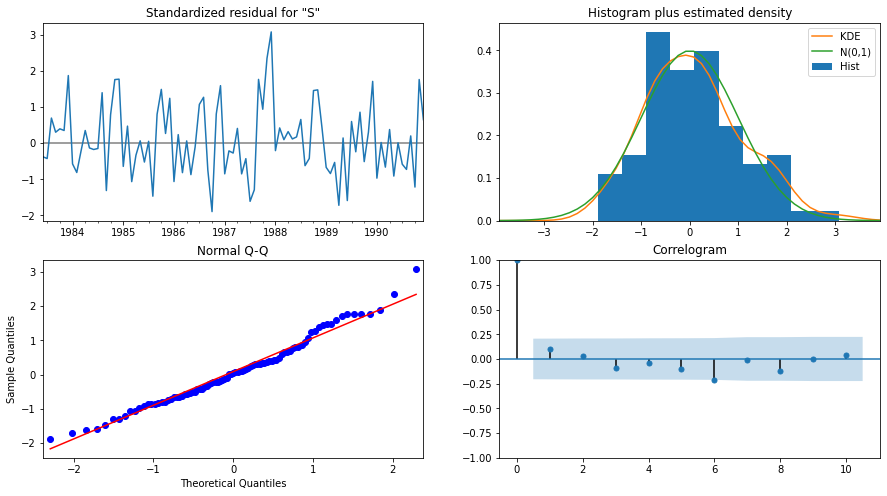

In [149]:
results_auto_S_SARIMA.plot_diagnostics()
plt.show()

In [150]:
#Prediction on Test Data (Auto SARIMA Model)
predicted_auto_SARIMA_spark = results_auto_S_SARIMA.get_forecast(steps=len(stest))
predicted_auto_SARIMA1_spark= results_auto_S_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)
predicted_auto_SARIMA1_spark

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [151]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1594.827734  580.644652     456.785129    2732.870339
1991-02-28  1673.007103  629.092890     440.007696    2906.006510
1991-03-31  1783.134515  640.997788     526.801936    3039.467093
1991-04-30  1728.067603  643.942348     465.963792    2990.171414
1991-05-31  1701.623448  644.156965     439.098996    2964.147899

In [152]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_SARIMA_spark.predicted_mean,squared=False)
rmse

1000.6437950215239

In [166]:
A_SARIMA_Spark= pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,predicted_auto_SARIMA_spark.predicted_mean,squared=False)]},index=['SARIMA (3, 1, 3) (0, 0, 3, 12)'])
RMSE_Sparkling = pd.concat([LRs, NMs, MAs, SAs, S_SES, S_DES, S_TES, S_M_TES, R_S_ARIMA, SM_ARIMA, A_SARIMA_Spark], axis=0)
RMSE_Sparkling

Test RMSE Sparkling
Regression On Time                                    1389.135175
Naive Model                                           3864.279352
4point Trailing MovingAverage                         1156.589694
6point Trailing MovingAverage                         1283.927428
9point Trailing MovingAverage                         1346.278315
Simple Average Model                                  1275.081804
Simple Exponential Smoothing                          1338.004623
Double Exponential Smoothing                          5291.879833
Exponential Smoothing (Additive Seasonality)           378.626241
Exponential Smoothing (Multi Seasonality)              403.706228
ARIMA (2, 1, 2)                                       1299.980660
ARIMA (0, 1, 0)                                       3864.279352
SARIMA (3, 1, 3) (0, 0, 3, 12)                        1000.643795

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


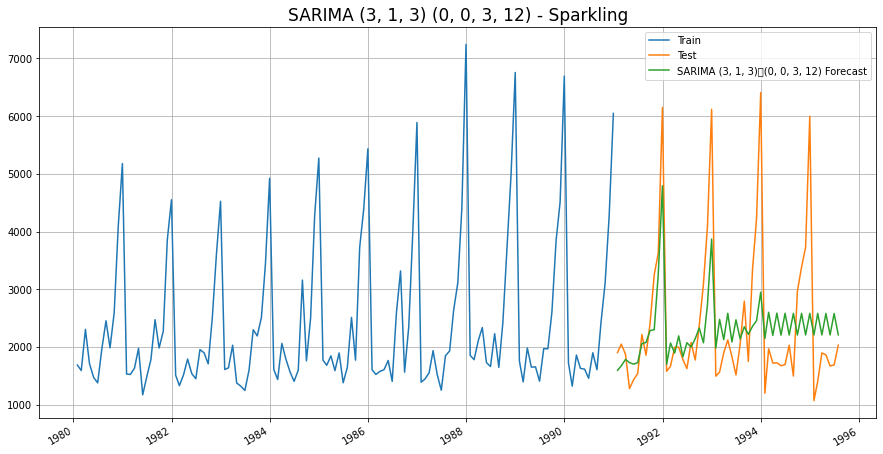

In [157]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
predicted_auto_SARIMA_spark.predicted_mean.plot(label='SARIMA (3, 1, 3)	(0, 0, 3, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 3) (0, 0, 3, 12) - Sparkling', fontsize=17);

#### Model 12 - Manual SARIMA Model

Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots - Seasonality at 12

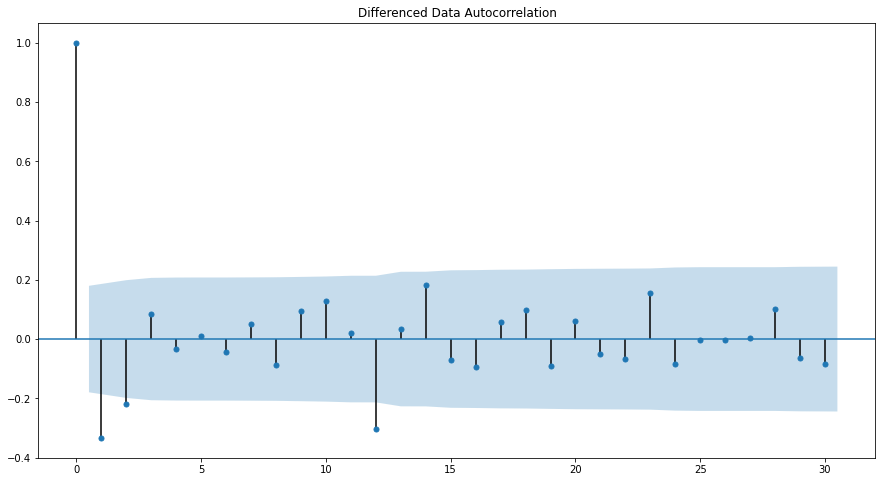

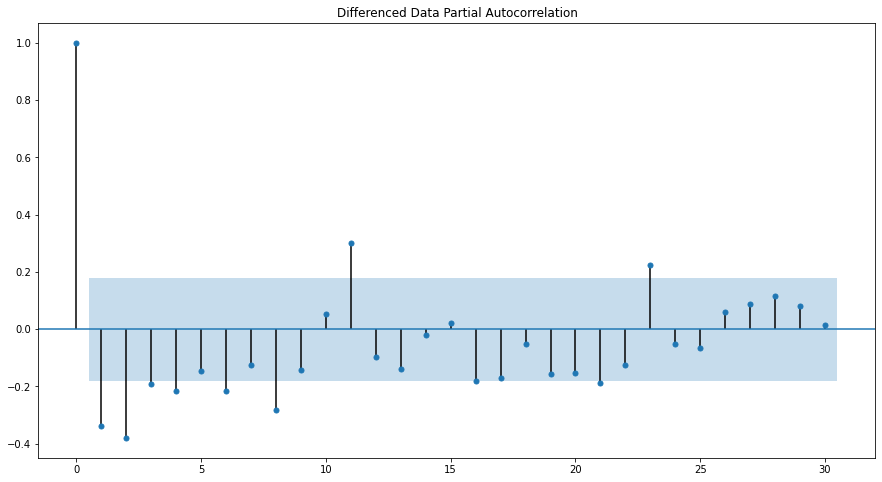

In [159]:
#We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.
plot_acf((strain['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((strain['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12 We are taking the p value to be 2 and the q value also to be 0 as the parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 4.
The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 2.

In [160]:
manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(4, 1, [1, 2], 12)   Log Likelihood                -544.303
Date:                                 Sun, 19 Feb 2023   AIC                           1102.605
Time:                                         09:06:24   BIC                           1118.444
Sample:                                              0   HQIC                          1108.904
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3380      0.215      1.573      0.116      -0.083       0

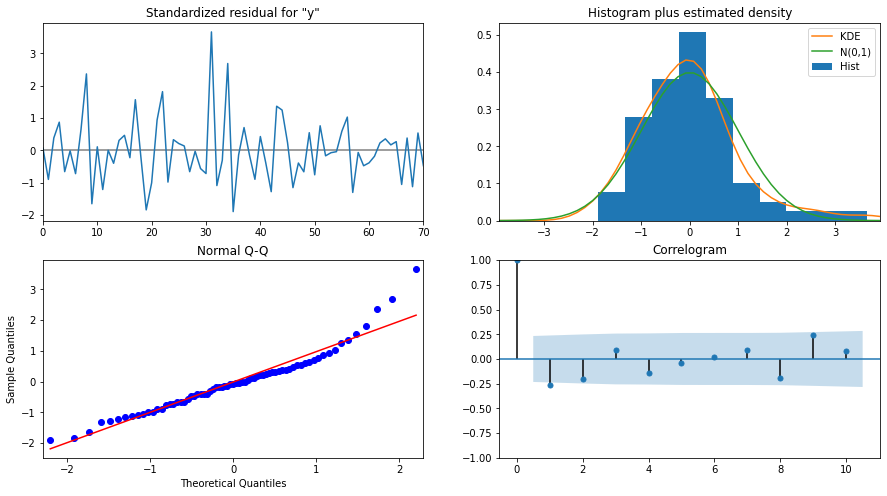

In [161]:
results_manual_SARIMA_spark.plot_diagnostics();

In [162]:
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(stest))

In [163]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA_spark.predicted_mean,squared=False)
rmse

1336.560606161121

In [164]:
SARIMA_stest=stest.copy()
SARIMA_stest['Sparkling_manual_forecasted'] = predicted_manual_SARIMA_spark.predicted_mean
SARIMA_stest.head()

Sparkling  Sparkling_manual_forecasted
TimeStamp                                         
1991-01-31       1902                  1317.630290
1991-02-28       2049                   944.250269
1991-03-31       1874                  1563.176386
1991-04-30       1279                  1184.308437
1991-05-31       1432                  1212.067972

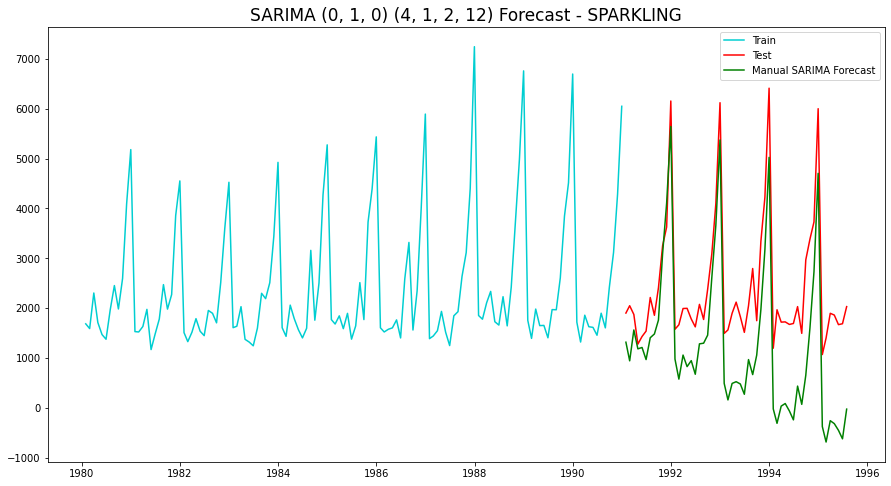

In [165]:
plt.plot(strain['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(stest['Sparkling'], label='Test', color = 'red')

plt.plot(SARIMA_stest['Sparkling_manual_forecasted'], color='green', label='Manual SARIMA Forecast')
plt.title('SARIMA (0, 1, 0) (4, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.legend(loc='best')

In [168]:
S_manual_SARIMA= pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,predicted_manual_SARIMA_spark.predicted_mean,squared=False)]},index=['SARIMA (0, 1, 0) (4, 1, 2, 12)'])
RMSE_Sparkling = pd.concat([LRs, NMs, MAs, SAs, S_SES, S_DES, S_TES, S_M_TES, R_S_ARIMA, SM_ARIMA, A_SARIMA_Spark, S_manual_SARIMA], axis=0)
RMSE_Sparkling

Test RMSE Sparkling
Regression On Time                                    1389.135175
Naive Model                                           3864.279352
4point Trailing MovingAverage                         1156.589694
6point Trailing MovingAverage                         1283.927428
9point Trailing MovingAverage                         1346.278315
Simple Average Model                                  1275.081804
Simple Exponential Smoothing                          1338.004623
Double Exponential Smoothing                          5291.879833
Exponential Smoothing (Additive Seasonality)           378.626241
Exponential Smoothing (Multi Seasonality)              403.706228
ARIMA (2, 1, 2)                                       1299.980660
ARIMA (0, 1, 0)                                       3864.279352
SARIMA (3, 1, 3) (0, 0, 3, 12)                        1000.643795
SARIMA (0, 1, 0) (4, 1, 2, 12)                        1336.560606

## Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [169]:
RMSE_Sparkling.sort_values(by=['Test RMSE Sparkling'])

Test RMSE Sparkling
Exponential Smoothing (Additive Seasonality)           378.626241
Exponential Smoothing (Multi Seasonality)              403.706228
SARIMA (3, 1, 3) (0, 0, 3, 12)                        1000.643795
4point Trailing MovingAverage                         1156.589694
Simple Average Model                                  1275.081804
6point Trailing MovingAverage                         1283.927428
ARIMA (2, 1, 2)                                       1299.980660
SARIMA (0, 1, 0) (4, 1, 2, 12)                        1336.560606
Simple Exponential Smoothing                          1338.004623
9point Trailing MovingAverage                         1346.278315
Regression On Time                                    1389.135175
Naive Model                                           3864.279352
ARIMA (0, 1, 0)                                       3864.279352
Double Exponential Smoothing                          5291.879833

### Best Model for SPARKLNG with Least RMSE - Exponential Smoothing (Additive Seasonality) using damped trend

In [170]:
ES_Ad_Spark = ExponentialSmoothing(df2, trend='add',seasonal='additive',initialization_method='estimated', damped_trend=False)
ES_Ad_Spark_fit = ES_Ad_Spark.fit(optimized=True)

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters')
print('')
print(ES_Ad_Spark_fit.params)


Holt Winters model Exponential Smoothing Estimated Parameters

{'smoothing_level': 0.07596713707785278, 'smoothing_trend': 0.0325692198217552, 'smoothing_seasonal': 0.37660762989959706, 'damping_trend': nan, 'initial_level': 2356.5012332716906, 'initial_trend': -1.036745207736693, 'initial_seasons': array([-636.253048  , -723.00015609, -398.67058104, -473.454497  ,
       -808.43188926, -815.36879572, -384.24762791,   72.99999114,
       -237.46119187,  272.34548171, 1541.39086828, 2590.11215318]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [171]:
# Forecasting using this model for the duration of the test set
TES_predict_Spark =  ES_Ad_Spark_fit.forecast(steps=12)
TES_predict_Spark
prediction_1 = TES_predict_Spark
TES_predict_Spark.to_csv('saprk_forecast_tes.csv')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [172]:
pred_1_df2 = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(ES_Ad_Spark_fit.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(ES_Ad_Spark_fit.resid,ddof=1)})
pred_1_df2.head()

lower_CI   prediction     upper_ci
1995-08-31  1159.493346  1877.418941  2595.344537
1995-09-30  1687.346660  2405.272256  3123.197852
1995-10-31  2524.165952  3242.091547  3960.017143
1995-11-30  3204.249089  3922.174685  4640.100281
1995-12-31  5400.561251  6118.486847  6836.412442

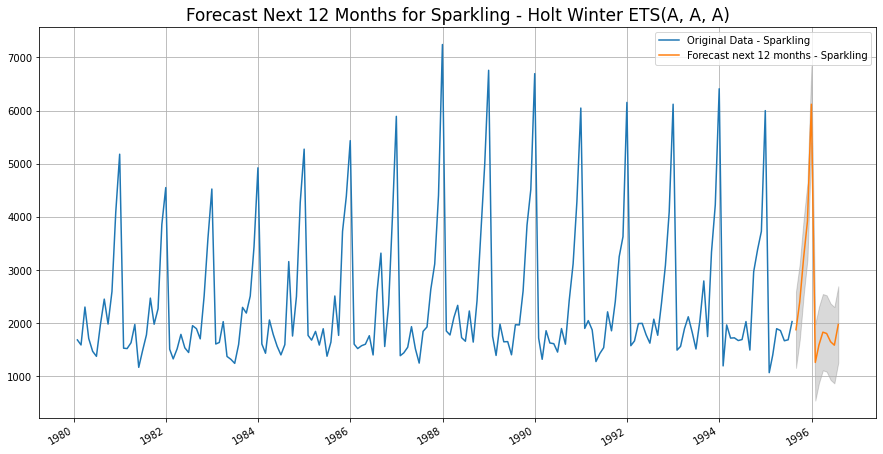

In [175]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(df2['Sparkling'], label='Original Data - Sparkling')

ax =TES_predict_Spark.plot(label='Forecast next 12 months - Sparkling')
ax.fill_between(pred_1_df2.index,pred_1_df2['lower_CI'], pred_1_df2['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Sparkling - Holt Winter ETS(A, A, A)', fontsize=17);